**Description of project:**
 **Analysis of the Android Malware Dataset to distinguish between normal and
malware traffics:** 
1. Preparing the dataset for applying for Machine Learning Algorithms (searching for null value, remove, merge all of CSV files)
2. Data Cleaning: apply for feature selection technique
3. Data normalization with three methods (Minimax or Unit Scaling, Standard scaling, Quantile scaling) and find best one
4. Apply for SOM and MLP machine learning algorithms for classify of data
5. Visualize the data with Matplotlib Library

dataset at : https://www.unb.ca/cic/datasets/andmal2017.html

Main Function for prepairing the dataset

**Run on spyder**

In [ ]:
import pandas as pd
import os

""" change the directoty to Adware folder,
        read all of the csv files and
        save name of all cvs file on File_name_adware array
        then concat all of them """
        
def concat_csv_files(a):
    os.chdir(a)
    entries = os.listdir(os.getcwd())
    File_name = []
    print("Direction: ", a)
    for entry in entries:
        print(entry)
        if os.path.isfile(entry):
            continue
        dirc = os.getcwd()+"/"+ entry +'/'
        files = os.listdir(dirc)
        for csv in files:
            data = pd.read_csv(dirc+csv)
            File_name.append(data)
    print("Concating the csv files ... ")
    pd.concat(File_name).to_csv("newtotal.csv", index=False)
    print("Done!")
    print ("===============================================")


""" searching for rows of Null values in csv file """    
def seraching_null_value(d):
    os.chdir(d)
    data = pd.read_csv("total.csv")
    print("searching for columns of Null values in csv file ... ")
    null_columns = data.columns[data.isnull().any()]
    data[null_columns].isnull().sum()
    print("deleting any record with Null value ... ")
    """ To delete any record, have a Null value """
    data.dropna(axis=0, how='any')
    print("Done!")
    print ("===============================================")

    
""" Changing the label of from the name of malware family to NOT-BENIGN """   
def chang_label(c):
    os.chdir(c)
    data = pd.read_csv("total.csv")
    print("Changing the label ... ")
    for k in data[' Label']:
        if k != "BENIGN":
            data.replace(to_replace = k, value = "NOT-BENIGN")
    print("Done!")
    print ("===============================================")


""" Remove  columns with string value """
def remove_columns(b):
    os.chdir(b)
    data = pd.read_csv("total.csv")
    print("Removing the columns ... ")
    data.drop(["Flow ID", " Source IP", " Destination IP", " Timestamp"],
              axis = 1, inplace = True)
    print("Done!")
    print ("===============================================")


""" Concat csv files to create final data after pre peration """
def concatenate():
    NameOfFile = []
    list_dir = ['D:\original data\Adware', 'D:\original data\Benign',
                'D:\original data\Ransomware', 'D:\original data\Scareware', 
                'D:\original data\SMSmalware']
    for j in list_dir:
        print(j)
        os.chdir(j)
        data = pd.read_csv("newtotal.csv")
        NameOfFile.append(data)
    print("Concating the csv files ... ")
    os.chdir('D:\original data')
    pd.concat(NameOfFile).to_csv("newtotaldata.csv", index=False)
    print("Done!")
    print ("===============================================")


    
""" main function """
list_directory = ['D:\original data\Adware', 
                  'D:\original data\Benign', 
                  'D:\original data\Ransomware', 
                  'D:\original data\Scareware', 
                  'D:\original data\SMSmalware']

""" Concat csv files """
for i in list_directory:
    concat_csv_files(i)

""" Searching for null value and delete them """
for j in list_directory:
    seraching_null_value(i)

""" Changing the label of from the name of malware family to NOT-BENIGN """    
for i in list_directory:
    chang_label(i)

""" Remove 4 columns "Flow ID", " Source IP",
 " Destination IP", " Timestamp" from data frame """    
for j in list_directory:
    remove_columns(i)

""" Concat csv files to create final data after pre peration """    
concatenate()

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image
!pip install minisom
from google.colab import files
import random
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom  
import matplotlib.pyplot as plt
from pandas import DataFrame


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=abb1363660e0e60d9e85ca3a71a1a01f36b545e9381f1f6a171d61c1fc1ddd22
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built minisom


In [ ]:
uploaded = files.upload()

Saving totaldata.csv to totaldata.csv


In [ ]:
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print("Loading the data ... ")
finaldata = pd.read_csv("totaldata.csv")
print(" ... ready!")

print(finaldata)
print ("the size of our data : ", finaldata.shape)

finaldata[' Label'].value_counts()

print ("===============================================")
print(finaldata.describe())

print("the number of features were detected to have zero values: ")
print("that give us a statistical description about the dataset, such as maximum, minimum, standard deviation of each feature.")
print("13 features were detected to have zero values. That means those features have no effect on any calculation on the data set.")
print(" Therefore, we removed them from the data set.")

remain_column = [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets',
                ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', 
                ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', 
                ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', 
                ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', 
                ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', 
                ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', 
                ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', ' Bwd URG Flags', 
                ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', 
                ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', 
                ' Packet Length Variance', 'FIN Flag Count', ' RST Flag Count', ' PSH Flag Count', 
                ' ACK Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', 
                ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
                ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', 
                ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', 
                ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Label']

df = DataFrame(finaldata,columns = remain_column)
print("The new size of dataset is: ", df.shape)

print("Selectting the features ... ")
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
print("... done!")


Loading the data ... 
 ... ready!
         Source Port   Destination Port  ...   Label             label
0              54819                443  ...       0     ADWARE_DOWGIN
1              51023                443  ...       0     ADWARE_DOWGIN
2              39805                443  ...       0     ADWARE_DOWGIN
3              39805                443  ...       0     ADWARE_DOWGIN
4                443              36040  ...       0     ADWARE_DOWGIN
...              ...                ...  ...     ...               ...
690859         28392                 53  ...       0  SMSMALWARE_BIIGE
690860         34882                443  ...       0  SMSMALWARE_BIIGE
690861          2275                 53  ...       0  SMSMALWARE_BIIGE
690862            80              50763  ...       0  SMSMALWARE_BIIGE
690863         60774              40001  ...       0  SMSMALWARE_BIIGE

[690864 rows x 73 columns]
the size of our data :  (690864, 73)
         Source Port   Destination Port  ...     

In [ ]:
# normalizing the of the features between 0 and 1

print ("Normalizing the dataset ... ")
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("... Ready!")

Normalizing the dataset ... 
... Ready!


In [ ]:

remain_column_new = [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets',
                ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', 
                ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', 
                ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', 
                ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', 
                ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', 
                ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', 
                ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', ' Bwd URG Flags', 
                ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', 
                ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', 
                ' Packet Length Variance', 'FIN Flag Count', ' RST Flag Count', ' PSH Flag Count', 
                ' ACK Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', 
                ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
                ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', 
                ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', 
                ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max']

In [ ]:
# first techniqe for feature selection is random forest classifier

from sklearn.ensemble import RandomForestClassifier
print ("Apply for RandomForestClassifier function to reduce the number of features ... ")
RF = RandomForestClassifier(bootstrap=True, class_weight=None, 
            criterion='gini', max_depth=None, max_features='auto', 
            max_leaf_nodes=None, min_impurity_decrease=0.0, 
            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False)
print(" ... done!")
print(" ================================================ ")

X_new = pd.DataFrame(data=X, columns=remain_column_new )

print("Training the data ... ")
RF.fit(X_new, y)
print(" ... done!")

Apply for RandomForestClassifier function to reduce the number of features ... 
 ... done!
Training the data ... 
 ... done!


Feature Importance Score: 
 Source Port             0.089165
 Flow IAT Max            0.063212
 Flow Duration           0.061643
 Flow IAT Mean           0.060211
 Flow IAT Min            0.053118
                           ...   
 min_seg_size_forward    0.000002
Bwd Avg Bulk Rate        0.000000
 ECE Flag Count          0.000000
 RST Flag Count          0.000000
 Bwd URG Flags           0.000000
Length: 67, dtype: float64


No handles with labels found to put in legend.


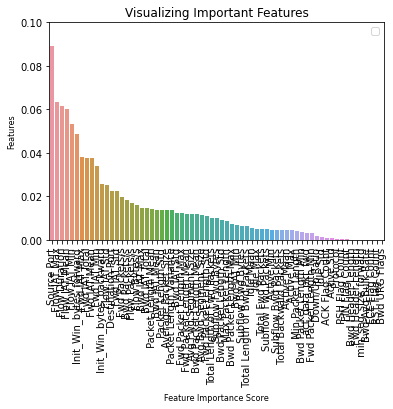

In [ ]:
import seaborn as sns

feature_imp = pd.Series(RF.feature_importances_,index=remain_column_new).sort_values(ascending=False)
print ("Feature Importance Score: ")
print (feature_imp)

# Creating a bar plot 
chart=sns.barplot(y=feature_imp, x=feature_imp.index )
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize=8)
plt.ylabel('Features', fontsize=8)
plt.ylim(0.0, 0.10)
plt.title("Visualizing Important Features")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.legend()
plt.show()

In [ ]:
# we notice less important features, we put a threshold any features
# importance less than 0.001 is removed from the data set.

remove_feature_names = []
for i in range(len(feature_imp)):
    if  feature_imp[i] <= 0.001:
        remove_feature_names.append(feature_imp.index[i])
print ("we notice less important features, we put a threshold less than 0.001 is removed from the data set, are candidate to remove :")
print("=================================================================")
print("=================================================================")
print("The number of features is removed from dataset is:" , len(remove_feature_names))
print("The name of features is removed from dataset are:")
print(remove_feature_names)
print("=================================================================")
print("=================================================================")

""" updating features ... """
X_feature_names = []
for i in range(len(feature_imp)):
    if  feature_imp[i] > 0.001:
        X_feature_names.append(feature_imp.index[i])

print("The number of features selected from dataset is: " ,len(X_feature_names))
print("The name of features selected from dataset are: ")
print( X_feature_names)
print("==================================================================")
print("=================================================================")

print("The new size of dataset is : ")
X_new_2 = pd.DataFrame(data=X_new, columns=X_feature_names)
print (X_new_2.shape)

X_new_2.describe()

we notice less important features, we put a threshold less than 0.001 is removed from the data set, are candidate to remove :
The number of features is removed from dataset is: 11
The name of features is removed from dataset are:
[' Active Std', ' Protocol', ' PSH Flag Count', 'FIN Flag Count', ' Bwd Header Length', ' Fwd Header Length', ' min_seg_size_forward', 'Bwd Avg Bulk Rate', ' ECE Flag Count', ' RST Flag Count', ' Bwd URG Flags']
The number of features selected from dataset is:  56
The name of features selected from dataset are: 
[' Source Port', ' Flow IAT Max', ' Flow Duration', ' Flow IAT Mean', ' Flow IAT Min', 'Init_Win_bytes_forward', ' Fwd IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Min', ' Init_Win_bytes_backward', ' Flow IAT Std', ' Destination Port', ' Fwd IAT Std', 'Fwd Packets/s', ' Bwd Packets/s', ' Flow Packets/s', 'Flow Bytes/s', ' Bwd IAT Max', 'Bwd IAT Total', ' Packet Length Mean', ' Bwd IAT Mean', ' Packet Length Std', ' Average Packet Size', ' Pack

Source Port   Flow IAT Max  ...       Idle Std   ACK Flag Count
count  690864.000000  690864.000000  ...  690864.000000    690864.000000
mean        0.592423       0.077318  ...       0.004562         0.452781
std         0.281681       0.153183  ...       0.040481         0.497766
min         0.000000       0.000000  ...       0.000000         0.000000
25%         0.523107       0.000355  ...       0.000000         0.000000
50%         0.662170       0.002424  ...       0.000000         0.000000
75%         0.800131       0.083281  ...       0.000000         1.000000
max         1.000000       1.000000  ...       1.000000         1.000000

[8 rows x 56 columns]

Using LassoCV to find correlation between features ... 
training the model ... 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.834486055682646, tolerance: 12.673604211031885
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.989946296962444, tolerance: 12.673604211031885
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.797972029322409, tolerance: 12.673604211031885
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to 

... done!
Best alpha using built-in LassoCV: 0.000008
Best score using built-in LassoCV: 0.008034
Lasso picked 37 variables and eliminated the other 19 variables
The number of columns picked from dataset: 
37
The name of columns picked from dataset: 
[' Source Port', ' Flow IAT Max', ' Flow Duration', ' Flow IAT Mean', 'Init_Win_bytes_forward', ' Fwd IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Min', ' Init_Win_bytes_backward', ' Flow IAT Std', ' Destination Port', 'Fwd Packets/s', ' Bwd Packets/s', 'Flow Bytes/s', ' Bwd IAT Max', 'Bwd IAT Total', ' Packet Length Mean', ' Bwd IAT Mean', ' Packet Length Std', ' Packet Length Variance', ' Fwd Packet Length Max', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Bwd Packet Length Mean', ' Fwd Packet Length Std', ' Bwd Packet Length Std', ' Max Packet Length', 'Bwd Packet Length Max', ' Idle Max', ' Active Max', ' Min Packet Length', ' Bwd Packet Length Min', ' Fwd Packet Length Min', ' Down/Up Ratio', ' Idle Std', ' ACK Flag 

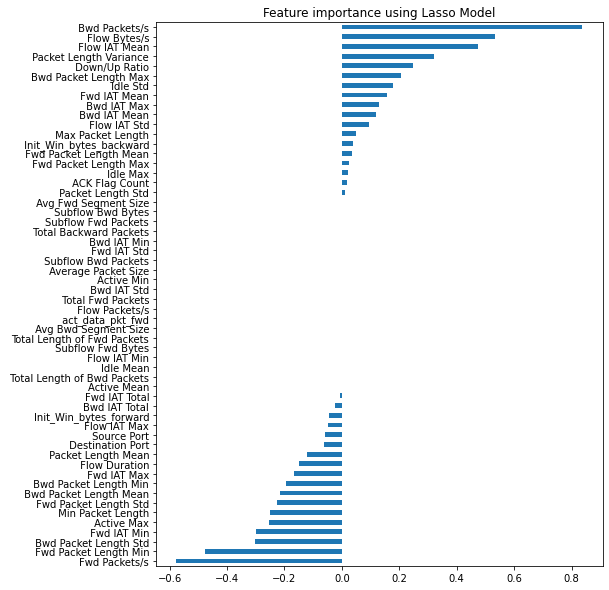

In [ ]:
# Second Technique for feature reduction is Embedded methods 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib

print("Using LassoCV to find correlation between features ... ")
reg = LassoCV()
print ("training the model ... ")
reg.fit(X_new_2, y)
print ("... done!")
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_new_2,y))
coef = pd.Series(reg.coef_, index = X_feature_names)
print("=================================================================")
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# updating the columns
new_columns_coef = []
for i in range (len(coef)):
    if (coef[i]!= 0):
        new_columns_coef.append(X_feature_names[i])


print("The number of columns picked from dataset: ")     
print(len(new_columns_coef))
print("The name of columns picked from dataset: ")
print(new_columns_coef)

X_new_3 = pd.DataFrame(data=X_new_2, columns=new_columns_coef)
X_new_3.dtypes
X_new_3.to_numpy()
print ("The new size of our dataset: ", X_new_3.shape)

In [ ]:
# spliting the dataset in two different part : training and testing datasets
y = finaldata.iloc[:, -1].values
X_new_3 = pd.DataFrame(data=X_new_3, columns=new_columns_coef)

X_train, X_test, y_train, y_test = train_test_split(X_new_3, y, test_size=0.30, random_state=1) # 70% training and 30% test
print("The len of training dataset:")
print(len(X_train))
print("The len of test dataset:")
print(len(X_test))

The len of training dataset:
483604
The len of test dataset:
207260


**first algorithm (Random Forest algorithm )**

In [ ]:
# apply for first algorithm (Random Forest algorithm )

rf = RandomForestClassifier(bootstrap=True, class_weight=None, 
            criterion='gini', max_depth=None, max_features='auto', 
            max_leaf_nodes=None, min_impurity_decrease=0.0, 
            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False) 
model_rf = rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

print("apply for Random Forest algorithm with ", len(new_columns_coef) , "features")
print("Train Set Accuracy for RandomForest algorithm: "+str(accuracy_score(y_train_pred_rf,y_train)*100))
print("Test Set Accuracy for RandomForest algorithm: "+str(accuracy_score(y_test_pred_rf,y_test)*100))
print(" ... done!")

print("Confusion Matrix for random forest classifier: ")
print(metrics.confusion_matrix(y_test, y_test_pred_rf))
print ("... ready!")


apply for Random Forest algorithm with  37 features
Train Set Accuracy for RandomForest algorithm: 98.29137062555314
Test Set Accuracy for RandomForest algorithm: 70.25378751326836
 ... done!
Confusion Matrix for random forest classifier: 
[[ 45241  38449]
 [ 23203 100367]]
... ready!


In [ ]:
# calculating confusion_matrix values

TP = metrics.confusion_matrix(y_test, y_test_pred_rf)[1][1] #true positive
FN = metrics.confusion_matrix(y_test, y_test_pred_rf)[1][0] #False negative
FP = metrics.confusion_matrix(y_test, y_test_pred_rf)[0][1] #False positive
TN = metrics.confusion_matrix(y_test, y_test_pred_rf)[0][0] #true negative

""" Accuracy, Precions, Recall, F1 Score Calculation """
Acc = (TP+TN)/(TP+TN+FN+FP)
Prec = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall*Prec)/(Recall+Prec)

print("Accuracy, Precions, Recall, F1 Score for Random Forest Algorithm:")
print("Accuracy:","%.5f" % Acc)
print ("Precions:","%.5f" %Prec )
print("Recall:","%.5f" % Recall)
print ("F1:","%.5f" %F1 )

Accuracy, Precions, Recall, F1 Score for Random Forest Algorithm:
Accuracy: 0.70254
Precions: 0.72302
Recall: 0.81223
F1: 0.76503


**Second Algorithm : Decision Tree Classifier**

Accuracy for Decision tree algorithm with dataset  37 features:  0.5997925311203319
Visualizing the Decision tree with depth 3:


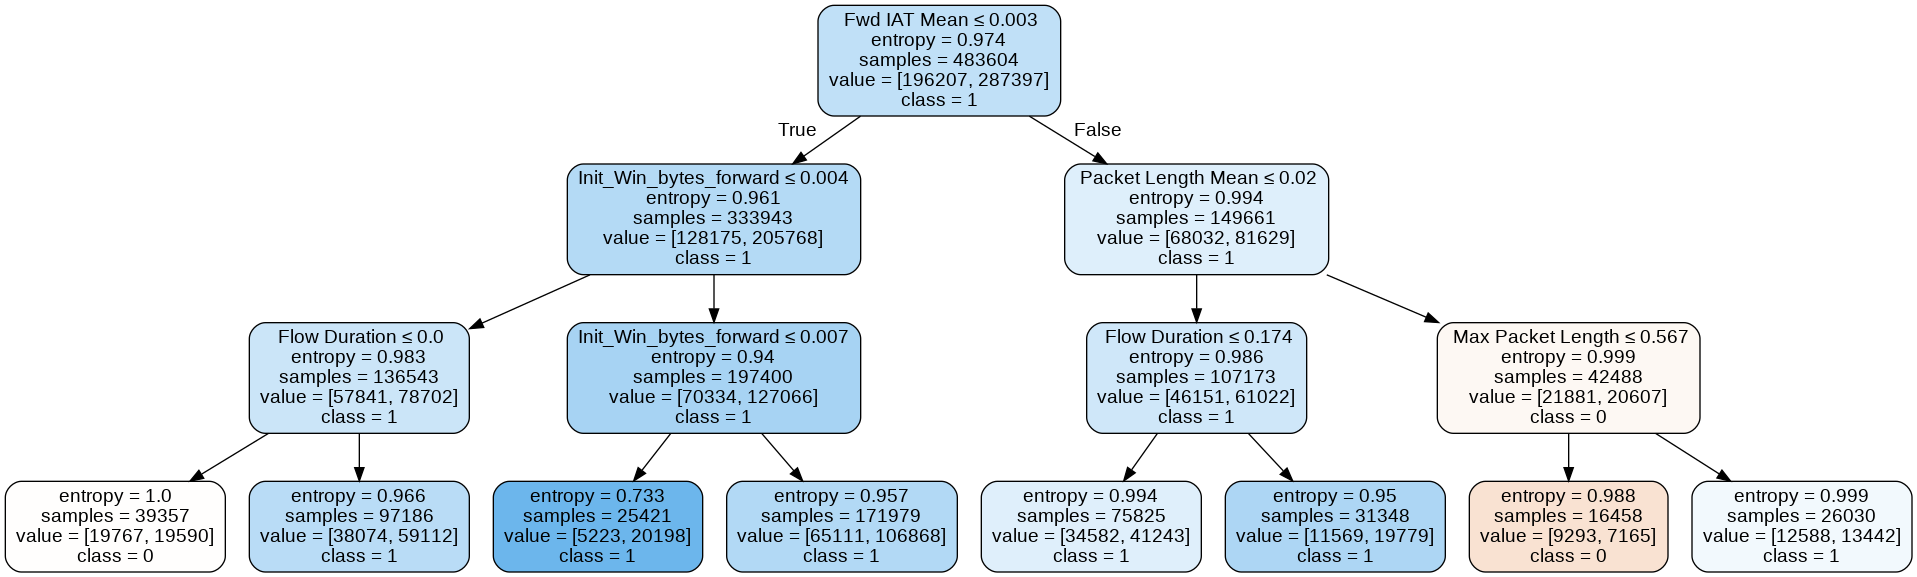

In [ ]:
# Decision tree algorithm with main dataset

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer """
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset """
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct? """
print("Accuracy for Decision tree algorithm with dataset ", len(new_columns_coef) , "features: ",metrics.accuracy_score(y_test, y_pred))

print("Visualizing the Decision tree with depth 3:")
# class_value : 0, 1 """
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = new_columns_coef, 
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('01.png')
Image(graph.create_png())

In [ ]:
y_train_pred_dt = clf.predict(X_train)
y_test_pred_dt = clf.predict(X_test)

print("Train Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_train_pred_dt,y_train)*100))
print("Test Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_test_pred_dt,y_test)*100))

print("Confusion Matrix for Decision tree algorithm: ")
print(metrics.confusion_matrix(y_test, y_test_pred_dt))

Train Set Accuracy for Decision tree algorithm: 59.904798140627456
Test Set Accuracy for Decision tree algorithm: 59.97925311203319
Confusion Matrix for Decision tree algorithm: 
[[ 12211  71479]
 [ 11468 112102]]


In [ ]:
# calculating confusion_matrix values for main dataset 

TP = metrics.confusion_matrix(y_test, y_test_pred_dt)[1][1] #true positive
FN = metrics.confusion_matrix(y_test, y_test_pred_dt)[1][0] #False negative
FP = metrics.confusion_matrix(y_test, y_test_pred_dt)[0][1] #False positive
TN = metrics.confusion_matrix(y_test, y_test_pred_dt)[0][0] #true negative

""" Accuracy, Precions, Recall, F1 Score Calculation """
Acc = (TP+TN)/(TP+TN+FN+FP)
Prec = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall*Prec)/(Recall+Prec)

print("Accuracy, Precions, Recall, F1 Score for Decision Tree algorithm ... ")
print("Accuracy:","%.5f" % Acc)
print ("Precions:","%.5f" %Prec )
print("Recall:","%.5f" % Recall)
print ("F1:","%.5f" %F1 )

Accuracy, Precions, Recall, F1 Score for Decision Tree algorithm ... 
Accuracy: 0.59979
Precions: 0.61064
Recall: 0.90719
F1: 0.72995


Accuracy for Decision tree algorithm with dataset  37 features:  0.6052204959953681
Visualizing the Decision tree with depth 4:


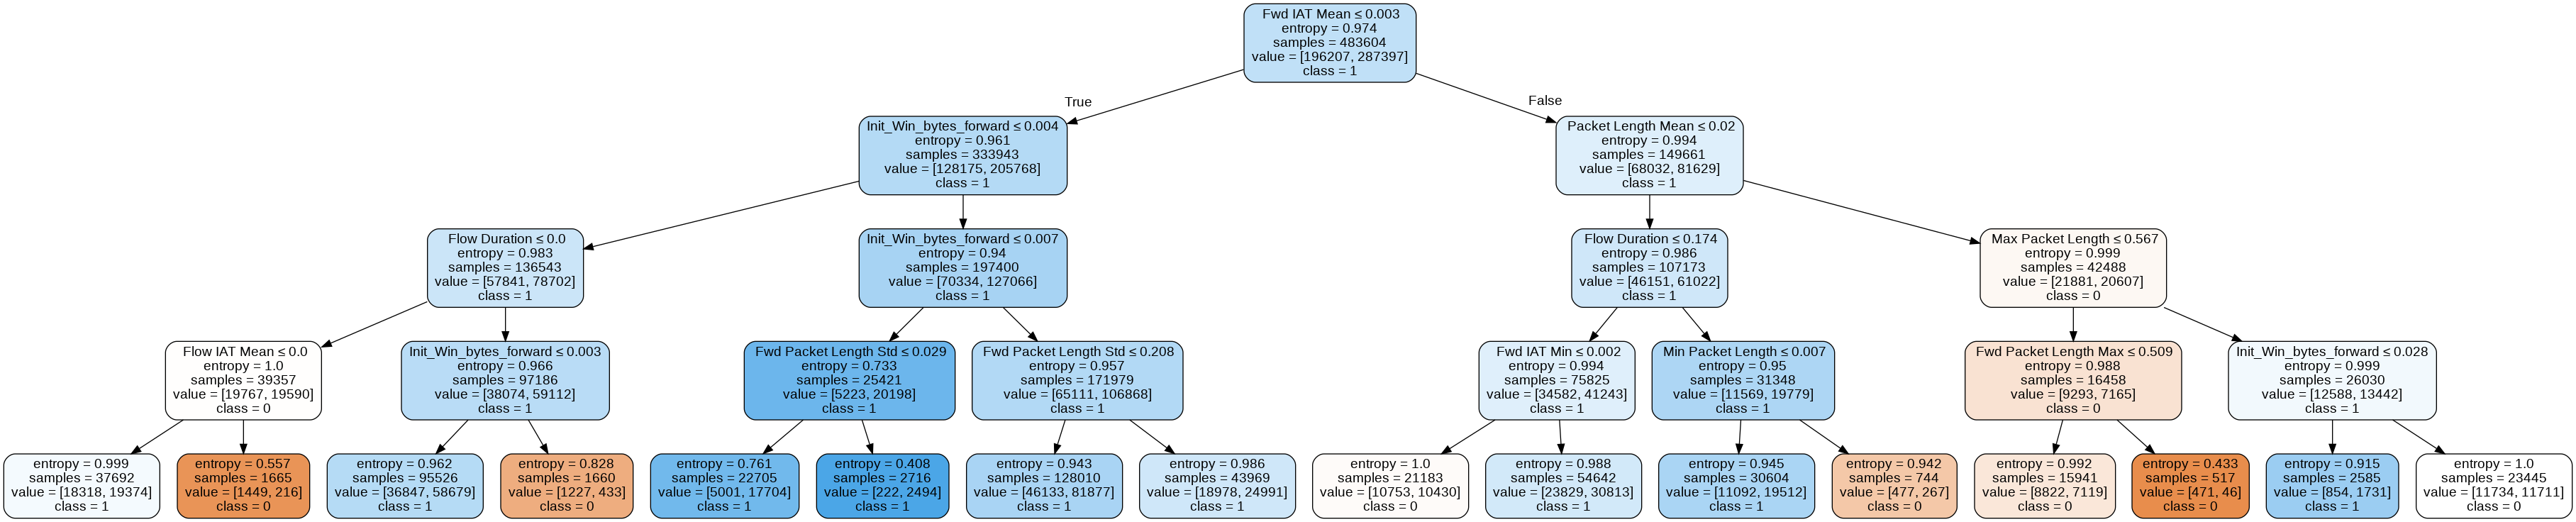

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer """
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset """
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct? """

print("Accuracy for Decision tree algorithm with dataset ", len(new_columns_coef) , "features: ",metrics.accuracy_score(y_test, y_pred))

print("Visualizing the Decision tree with depth 4:")


# class_value : 0, 1 """
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = new_columns_coef, 
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('01.png')
Image(graph.create_png())

In [ ]:
y_train_pred_dt = clf.predict(X_train)
y_test_pred_dt = clf.predict(X_test)

print("Train Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_train_pred_dt,y_train)*100))
print("Test Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_test_pred_dt,y_test)*100))

print("Confusion Matrix for Decision tree algorithm: ")
print(metrics.confusion_matrix(y_test, y_test_pred_dt))

Train Set Accuracy for Decision tree algorithm: 60.402312635958346
Test Set Accuracy for Decision tree algorithm: 60.52204959953681
Confusion Matrix for Decision tree algorithm: 
[[ 14987  68703]
 [ 13119 110451]]


In [ ]:
# calculating confusion_matrix values for main dataset 

TP = metrics.confusion_matrix(y_test, y_test_pred_dt)[1][1] #true positive
FN = metrics.confusion_matrix(y_test, y_test_pred_dt)[1][0] #False negative
FP = metrics.confusion_matrix(y_test, y_test_pred_dt)[0][1] #False positive
TN = metrics.confusion_matrix(y_test, y_test_pred_dt)[0][0] #true negative

""" Accuracy, Precions, Recall, F1 Score Calculation """
Acc = (TP+TN)/(TP+TN+FN+FP)
Prec = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall*Prec)/(Recall+Prec)

print("Accuracy, Precions, Recall, F1 Score for Decision Tree algorithm ... ")
print("Accuracy:","%.5f" % Acc)
print ("Precions:","%.5f" %Prec )
print("Recall:","%.5f" % Recall)
print ("F1:","%.5f" %F1 )

Accuracy, Precions, Recall, F1 Score for Decision Tree algorithm ... 
Accuracy: 0.60522
Precions: 0.61651
Recall: 0.89383
F1: 0.72971


Accuracy for Decision tree algorithm with dataset  37 features:  0.6089935346907266
Visualizing the Decision tree with depth 5:


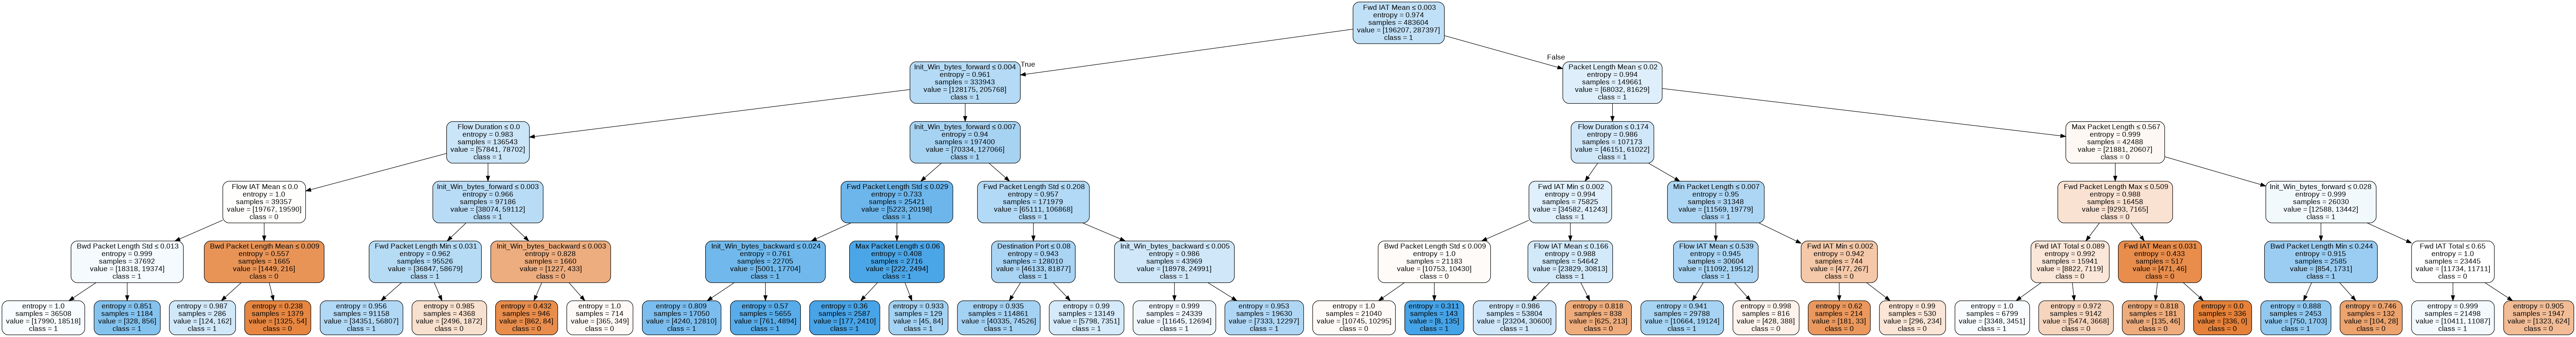

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# Train Decision Tree Classifer """
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset """
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct? """
print("Accuracy for Decision tree algorithm with dataset ", len(new_columns_coef) , "features: ",metrics.accuracy_score(y_test, y_pred))

print("Visualizing the Decision tree with depth 5:")
# class_value : 0, 1 """
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = new_columns_coef, 
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('01.png')
Image(graph.create_png())

In [ ]:
y_train_pred_dt = clf.predict(X_train)
y_test_pred_dt = clf.predict(X_test)

print("Train Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_train_pred_dt,y_train)*100))
print("Test Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_test_pred_dt,y_test)*100))

print("Confusion Matrix for Decision tree algorithm: ")
print(metrics.confusion_matrix(y_test, y_test_pred_dt))

Train Set Accuracy for Decision tree algorithm: 60.835725097393734
Test Set Accuracy for Decision tree algorithm: 60.89935346907266
Confusion Matrix for Decision tree algorithm: 
[[ 10389  73301]
 [  7739 115831]]


In [ ]:
# calculating confusion_matrix values for main dataset 

TP = metrics.confusion_matrix(y_test, y_test_pred_dt)[1][1] #true positive
FN = metrics.confusion_matrix(y_test, y_test_pred_dt)[1][0] #False negative
FP = metrics.confusion_matrix(y_test, y_test_pred_dt)[0][1] #False positive
TN = metrics.confusion_matrix(y_test, y_test_pred_dt)[0][0] #true negative

""" Accuracy, Precions, Recall, F1 Score Calculation """
Acc = (TP+TN)/(TP+TN+FN+FP)
Prec = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall*Prec)/(Recall+Prec)

print("Accuracy, Precions, Recall, F1 Score for Decision Tree algorithm ... ")
print("Accuracy:","%.5f" % Acc)
print ("Precions:","%.5f" %Prec )
print("Recall:","%.5f" % Recall)
print ("F1:","%.5f" %F1 )

Accuracy, Precions, Recall, F1 Score for Decision Tree algorithm ... 
Accuracy: 0.60899
Precions: 0.61243
Recall: 0.93737
F1: 0.74084


Accuracy for Decision tree algorithm with dataset  37 features:  0.6151404033581009
Visualizing the Decision tree with depth 6:


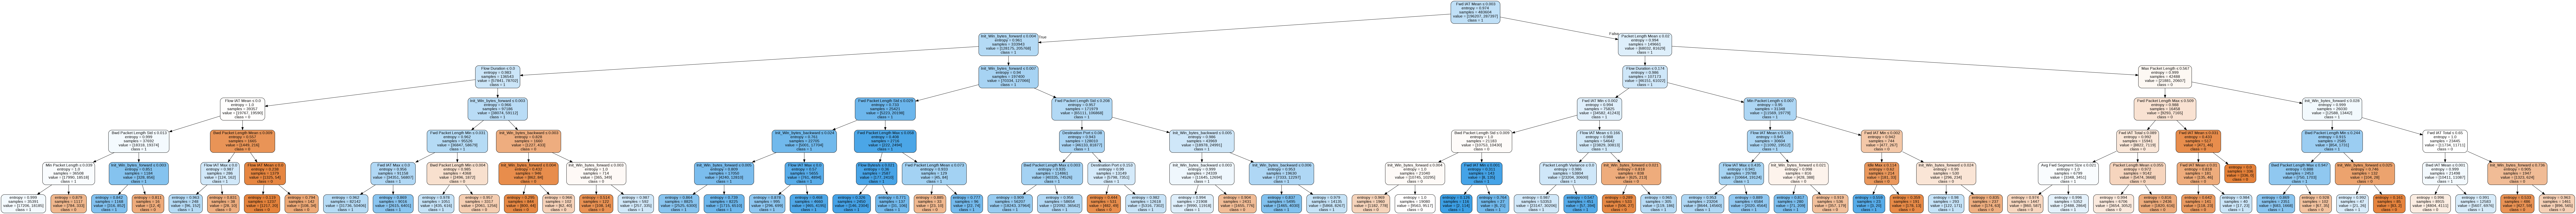

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)
# Train Decision Tree Classifer """
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset """
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct? """
print("Accuracy for Decision tree algorithm with dataset ", len(new_columns_coef) , "features: ",metrics.accuracy_score(y_test, y_pred))

print("Visualizing the Decision tree with depth 6:")
# class_value : 0, 1 """
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = new_columns_coef, 
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('01.png')
Image(graph.create_png())

In [ ]:
y_train_pred_dt = clf.predict(X_train)
y_test_pred_dt = clf.predict(X_test)

print("Train Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_train_pred_dt,y_train)*100))
print("Test Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_test_pred_dt,y_test)*100))

print("Confusion Matrix for Decision tree algorithm: ")
print(metrics.confusion_matrix(y_test, y_test_pred_dt))

Train Set Accuracy for Decision tree algorithm: 61.52657959818364
Test Set Accuracy for Decision tree algorithm: 61.514040335810094
Confusion Matrix for Decision tree algorithm: 
[[ 13657  70033]
 [  9733 113837]]


In [ ]:
# calculating confusion_matrix values for main dataset 

TP = metrics.confusion_matrix(y_test, y_test_pred_dt)[1][1] #true positive
FN = metrics.confusion_matrix(y_test, y_test_pred_dt)[1][0] #False negative
FP = metrics.confusion_matrix(y_test, y_test_pred_dt)[0][1] #False positive
TN = metrics.confusion_matrix(y_test, y_test_pred_dt)[0][0] #true negative

""" Accuracy, Precions, Recall, F1 Score Calculation """
Acc = (TP+TN)/(TP+TN+FN+FP)
Prec = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall*Prec)/(Recall+Prec)

print("Accuracy, Precions, Recall, F1 Score for Decision Tree algorithm ... ")
print("Accuracy:","%.5f" % Acc)
print ("Precions:","%.5f" %Prec )
print("Recall:","%.5f" % Recall)
print ("F1:","%.5f" %F1 )

Accuracy, Precions, Recall, F1 Score for Decision Tree algorithm ... 
Accuracy: 0.61514
Precions: 0.61912
Recall: 0.92123
F1: 0.74055


In [ ]:
acc_dt = []
for i in range (3,38):
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print("Accuracy in decision tree with depth:", i ," is ",metrics.accuracy_score(y_test, y_pred))
  acc_dt.append(metrics.accuracy_score(y_test, y_pred))
  print("=========================================================")
  print("=========================================================")

max=0.0
id= 0
for i in range(0,len(acc_dt)):
  if (max<acc_dt[i]):
    max = acc_dt[i]
    id = i

print("maximum accuracy in Decision Tree: ", max)
print("the best max_depth: ", i+3)

Accuracy in decision tree with depth: 3  is  0.5997925311203319
Accuracy in decision tree with depth: 4  is  0.6052204959953681
Accuracy in decision tree with depth: 5  is  0.6089935346907266
Accuracy in decision tree with depth: 6  is  0.6151404033581009
Accuracy in decision tree with depth: 7  is  0.6200569333204671
Accuracy in decision tree with depth: 8  is  0.6322107497828814
Accuracy in decision tree with depth: 9  is  0.635694297018238
Accuracy in decision tree with depth: 10  is  0.6408713692946059
Accuracy in decision tree with depth: 11  is  0.6467721702209784
Accuracy in decision tree with depth: 12  is  0.649647785390331
Accuracy in decision tree with depth: 13  is  0.6563495126893757
Accuracy in decision tree with depth: 14  is  0.6606822348740712
Accuracy in decision tree with depth: 15  is  0.6645807198687639
Accuracy in decision tree with depth: 16  is  0.6672150921547815
Accuracy in decision tree with depth: 17  is  0.6695503232654637
Accuracy in decision tree with dep

Third algorithm : K Nearest Neighbors (KNN)

15
Training the data ... 
16
Training the data ... 
17
Training the data ... 
18
Training the data ... 
19
Training the data ... 
20
Training the data ... 
21
Training the data ... 
22
Training the data ... 
23
Training the data ... 
24
Training the data ... 
------------------------------------
Apply for KNN Algorithm: 
------------------------------------
The range of neighbors: [15 ... 25]
The value for error rate when the K is changing :
[0.35355109524269035, 0.35887773810672585, 0.35447746791469653, 0.3594760204573965, 0.35485863167036574, 0.3596593650487311, 0.3555148123130368, 0.36015150053073436, 0.3561902923863746, 0.35970761362539805]
------------------------------------


Text(0, 0.5, 'Error Rate')

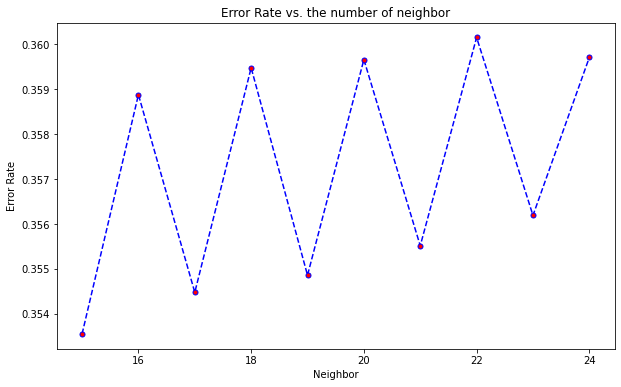

In [ ]:
error_rate = []
""" the number of neighbors are in range : [15 ... 25] """
minimum_error = 1
index = 0
for i in range(15,25):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    print("Training the data ... ")
    knn = knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    mean_error_rate = np.mean(pred_i != y_test)
    """ finding the best value for k in knn algorithm """
    if mean_error_rate < minimum_error :
        minimum_error = mean_error_rate
        index = i
    error_rate.append(mean_error_rate)
print("------------------------------------")
print("Apply for KNN Algorithm: ")
print("------------------------------------")
print("The range of neighbors: [15 ... 25]")
print ("The value for error rate when the K is changing :")
print (error_rate)
print("------------------------------------")
plt.figure(figsize=(10,6))
plt.plot(range(15, 25),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. the number of neighbor')
plt.xlabel('Neighbor')
plt.ylabel('Error Rate')
#print("The Best Value For K in KNN Algorithm :" , index)
#print("The minimum value for error :" , minimum_error )

In [ ]:
# After finding the best value for K, apply for KNN algorithm again to calculate test and train accuracy  

print("The Best Value For K in KNN Algorithm :" , index)
print("The minimum value for error :" , minimum_error )
print("===================================================")
print("===================================================")

print("Apply for KNN algorithm with best K is equal to ", index)
knn = KNeighborsClassifier(n_neighbors=index)
print("Training the data ... ")
knn = knn.fit(X_train,y_train)
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

print("Train Set Accuracy in KNN algorithm with best K: "+str(accuracy_score(y_train_pred_knn,y_train)*100))
print("Test Set Accuracy in KNN algorithm with best K: "+str(accuracy_score(y_test_pred_knn,y_test)*100))

print("Confusion Matrix for random forest classifier: ")
print(metrics.confusion_matrix(y_test, y_test_pred_knn))

The Best Value For K in KNN Algorithm : 15
The minimum value for error : 0.35355109524269035
Apply for KNN algorithm with best K is equal to  15
Training the data ... 
Train Set Accuracy in KNN algorithm with best K: 69.90202727851712
Test Set Accuracy in KNN algorithm with best K: 64.64489047573096
Confusion Matrix for random forest classifier: 
[[35092 48598]
 [24679 98891]]


In [ ]:
# calculating confusion_matrix values for main dataset 

TP = metrics.confusion_matrix(y_test, y_test_pred_knn)[1][1] #true positive
FN = metrics.confusion_matrix(y_test, y_test_pred_knn)[1][0] #False negative
FP = metrics.confusion_matrix(y_test, y_test_pred_knn)[0][1] #False positive
TN = metrics.confusion_matrix(y_test, y_test_pred_knn)[0][0] #true negative

""" Accuracy, Precions, Recall, F1 Score Calculation """
Acc = (TP+TN)/(TP+TN+FN+FP)
Prec = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall*Prec)/(Recall+Prec)

print("Accuracy, Precions, Recall, F1 Score for KNN algorithm ... ")
print("Accuracy:","%.5f" % Acc)
print ("Precions:","%.5f" %Prec )
print("Recall:","%.5f" % Recall)
print ("F1:","%.5f" %F1 )

Accuracy, Precions, Recall, F1 Score for KNN algorithm ... 
Accuracy: 0.64645
Precions: 0.67050
Recall: 0.80028
F1: 0.72966


The forth Algorithm : self-organizing map (SOM)

Training...

...ready!
Predicted     0.0  1.0
Actual                
0          279668  229
1          410665  302
Accuracy: 0.40525
Precions: 0.56874
Recall: 0.00073
F1: 0.00147


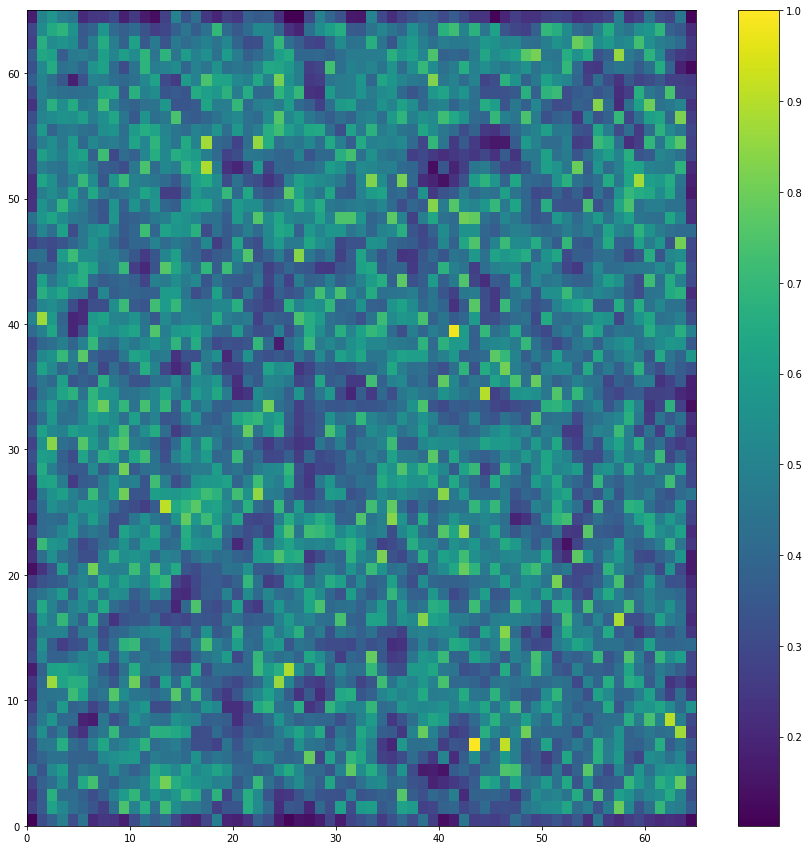

In [ ]:
som = MiniSom(x= 65, y = 65, input_len = len(new_columns_coef), sigma=0.1, learning_rate=0.3,random_seed=45)
random.seed(12)
som.random_weights_init(X_new_3.to_numpy())
print("Training...")
# Trains the SOM using all the vectors in data sequentially """ 
som.train_batch(data=X_new_3.to_numpy(),num_iteration=100) 
print("\n...ready!") 


# plotting the distance map """
dist_map = som.distance_map()
plt.figure(figsize=(15, 15))
plt.pcolor(dist_map.T) 
plt.colorbar()

X_new_3 = X_new_3.to_numpy()

# find the distances greater than 0.70 in the distance map """
distant_neurons_indexes = np.where(dist_map>0.80)


# compute the coordinates of the winner neuron for each sample of X """ 
map_neuron_indexes=np.zeros((len(X_new_3),2))
for j in range (len(X_new_3)):
    map_neuron_indexes[j]=(som.winner(X_new_3[j]))


total_fraud_neuron_customers={}
fraud_neuron_customers={}
# to find customer data indexes in distant neurons """
for k in range (len(distant_neurons_indexes[0])):
    fraud_neuron_customers[k] = np.where((map_neuron_indexes[:,0]==distant_neurons_indexes[0][k]) & (map_neuron_indexes[:,1]==distant_neurons_indexes[1][k]))

total_fraud_neuron_customers=np.concatenate((fraud_neuron_customers[0], fraud_neuron_customers[1]), axis=None)

# calculating the confusion matrix """
y_pred = np.zeros(len(y))
y_pred[total_fraud_neuron_customers] = 1

y_data = {'y_Actual':    y,
        'y_Predicted': y_pred }

df = pd.DataFrame(y_data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

confusion_matrix_arr=confusion_matrix.values

TP = confusion_matrix_arr[1,1] #true positive
FN = confusion_matrix_arr[1,0] #False negative
FP = confusion_matrix_arr[0,1] #False positive
TN = confusion_matrix_arr[0,0] #true negative

# Accuracy, Precions, Recall, F1 Score Calculation """
Acc = (TP+TN)/(TP+TN+FN+FP)
Prec = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall*Prec)/(Recall+Prec)

print("Accuracy:","%.5f" % Acc)
print ("Precions:","%.5f" %Prec )
print("Recall:","%.5f" % Recall)
print ("F1:","%.5f" %F1 )

In [ ]:

from keras.utils import np_utils
y_train_after = np_utils.to_categorical(y_train)
y_test_after = np_utils.to_categorical(y_test)


Using TensorFlow backend.


**The Fifth Algorithm : classifier model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

mymodel = Sequential()
mymodel.add(Dense(30, activation = 'relu', input_shape=(len(new_columns_coef),)))
mymodel.add(Dense(23 , activation = 'relu'))

mymodel.add(Dense(16 , activation = 'relu'))
mymodel.add(Dense(9 , activation = 'relu'))

mymodel.add(Dense(2 , activation = 'softmax'))

mymodel.summary()
mymodel.compile(optimizer = SGD(lr=0.01), loss= categorical_crossentropy, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                1140      
_________________________________________________________________
dense_2 (Dense)              (None, 23)                713       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 153       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 20        
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


Train on 386883 samples, validate on 96721 samples
Epoch 1/70
386883/386883 [==============================] - 14s 37us/step - loss: 0.6761 - accuracy: 0.5922 - val_loss: 0.6748 - val_accuracy: 0.5954
Epoch 2/70
386883/386883 [==============================] - 13s 33us/step - loss: 0.6750 - accuracy: 0.5940 - val_loss: 0.6743 - val_accuracy: 0.5954
Epoch 3/70
386883/386883 [==============================] - 14s 35us/step - loss: 0.6743 - accuracy: 0.5940 - val_loss: 0.6737 - val_accuracy: 0.5954
Epoch 4/70
386883/386883 [==============================] - 13s 33us/step - loss: 0.6738 - accuracy: 0.5940 - val_loss: 0.6734 - val_accuracy: 0.5954
Epoch 5/70
386883/386883 [==============================] - 13s 33us/step - loss: 0.6734 - accuracy: 0.5940 - val_loss: 0.6729 - val_accuracy: 0.5954
Epoch 6/70
386883/386883 [==============================] - 13s 33us/step - loss: 0.6731 - accuracy: 0.5940 - val_loss: 0.6727 - val_accuracy: 0.5954
Epoch 7/70
386883/386883 [=======================

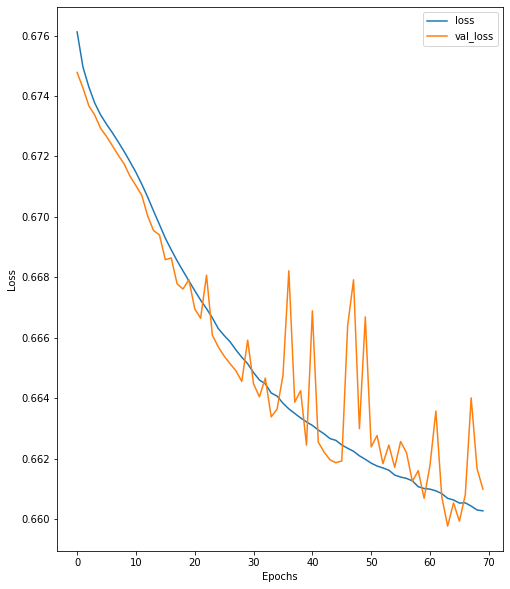

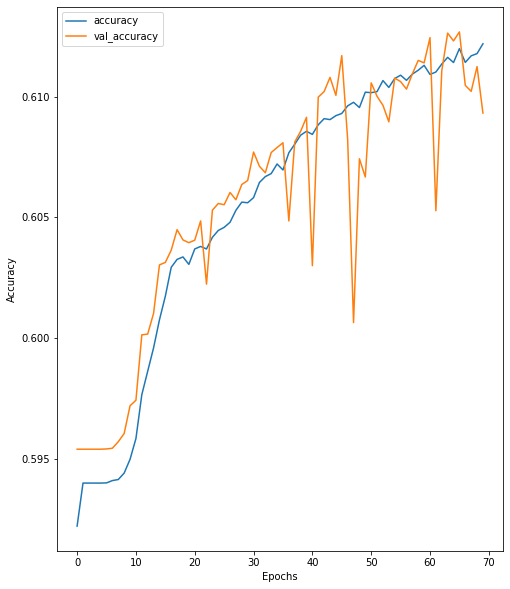

In [ ]:
import matplotlib.pyplot as plt

network_history = mymodel.fit(X_train, y_train_after, batch_size = 128, epochs=70, validation_split=0.2)
history = network_history.history

losses = history['loss']
val_losses = history['val_loss']
val_accuracies = history['val_accuracy']
accuracies = history['accuracy']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['loss','val_loss'])
	
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)
plt.plot(val_accuracies)
plt.legend(['accuracy','val_accuracy'])

#evaluation
test_loss, test_acc = mymodel.evaluate(X_test, y_test_after)
test_labels_p = mymodel.predict(X_test)
import numpy as np
test_labels_p = np.argmax(test_labels_p, axis=1)

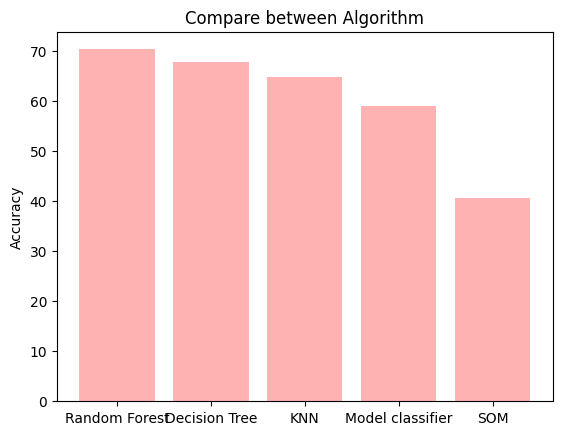

In [ ]:
# plotting the data between 5 different algorithms

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

Algorithm = ['Random Forest', 'Decision Tree', 'KNN', 'Model classifier', 'SOM']
y_pos = np.arange(len(Algorithm))

Accuracy = [70.25378751326836, 67.78973270288526, 64.64489047573096, 59.01, 40.524]

plt.bar(y_pos, Accuracy, align='center', alpha=0.3, color='r')
plt.xticks(y_pos, Algorithm)
plt.ylabel('Accuracy')
plt.title('Compare between Algorithm')

plt.show()


**Feature selection technique by the authors in [3]**

In [ ]:
uploaded = files.upload()

Saving totaldata.csv to totaldata.csv


In [ ]:
data = pd.read_csv('totaldata.csv')

In [ ]:
# remove columns with zero value 
col = [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']
col_new = [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio', ' Average Packet Size',' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']

X_new = pd.DataFrame(data=X, columns=col)
X_new_2 = pd.DataFrame(data=X_new, columns=col_new)

[0.07749094 0.03175595 0.00057742 0.0554748  0.00443662 0.00420803
 0.00794945 0.00716137 0.00946365 0.00214845 0.00800853 0.00748267
 0.00588452 0.00239319 0.00787648 0.00630849 0.02628785 0.05432145
 0.05520963 0.01758525 0.05612358 0.05655949 0.03077685 0.03051171
 0.01532344 0.0311213  0.03111727 0.00964382 0.00931972 0.00770801
 0.00978473 0.01030763 0.00069291 0.00943201 0.01264828 0.05453815
 0.03634856 0.00208733 0.00657942 0.00859769 0.00940662 0.00890398
 0.00021394 0.00064633 0.0004922  0.00081878 0.0023757  0.00316991
 0.0085766  0.00823003 0.00783381 0.00933471 0.00428901 0.00792667
 0.00434782 0.00706678 0.04045543 0.0214528  0.00346424 0.00848955
 0.00288344 0.00057281 0.00290882 0.00284609 0.00365493 0.00104768
 0.00368812 0.00365655]


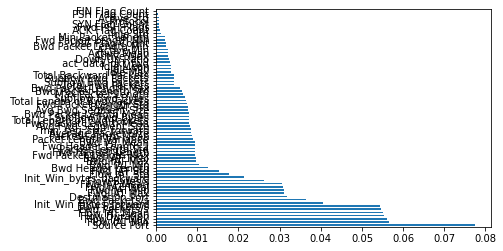

In [ ]:
# Feature selection technique by the authors in [3]
from sklearn.ensemble import ExtraTreesClassifier 
import pandas as pd

model = ExtraTreesClassifier()
model.fit(X_new_2,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = col_new)
feat_importances.nlargest(68).plot(kind='barh')
plt.show()

In [ ]:
# features importance for each columns
fe_imp = []
for i in range(len(model.feature_importances_)):
  fe_imp.append(model.feature_importances_[i])

In [ ]:
import heapq
import math
import numpy
def extract_features_each_class(id_class , number_per_class, name_class):
    
    print("calculating the mean for each feature ...")
    mean_features = []
    temp = 0
    for j in range (len(col_new)):
        for i in range (len(data)):
            if (data.iloc[i,81] == id_class):
                temp = temp + data.iloc[i,j]
        mean_features.append(temp/number_per_class)
        temp = 0
    print(mean_features)
    print(" ... done!")
    
    print("calculating the stdev for each features ... ")
    temp2 = 0
    stdev = []
    for j in range (len(col_new)):
        for i in range (len(data)):
            if (data.iloc[i,81] == id_class):
                temp2 = temp2 + ((data.iloc[i,j] - mean_features[j]) * (data.iloc[i,j] - mean_features[j]))
        stdev.append(math.sqrt(temp2/(number_per_class-1)))
        temp2 = 0
    print(stdev)
    print("\n ... done!")
    
    print("calculating the average standardized mean for each features ... ")
    average_stan_mean = []
    temp3 = 0
    norm = 0
    for j in range(len(col_new)):
        for i in range(len(data)):
            if (data.iloc[i,81] == id_class):
                norm = (data.iloc[i,j]-mean_features[j])/stdev[j]
                temp3 = temp3 + norm
        average_stan_mean.append(temp3/number_per_class)
        norm = 0
        temp3 = 0
    print(average_stan_mean)
    print("... done!")
    
    print("calculating the weigth ... ")
    result = []
    for i in range(len(average_stan_mean)):
        result.append(average_stan_mean[i]*fe_imp[i])
    print(result)
    print(" ... done!")
    
    print("select three best features in class ", name_class)
    a = numpy.array(result)
    index = heapq.nlargest(3, range(len(a)), a.take)
    
    print(col_new[index[0]] , "the weigth= ", result[index[0]])
    print(col_new[index[1]] , "the weigth= ", result[index[1]])
    print(col_new[index[2]] , "the weigth= ", result[index[2]])

In [ ]:
extract_features_each_class(10 , 3715, "SCAREWARE")

calculating the mean for each feature ...
[39210.45168236877, 5553.1308209959625, 7.739703903095559, 16064869.64602961, 7.73485868102288, 10.733512786002692, 745.5520861372813, 10979.340780619112, 231.5184387617766, 7.3927321668909824, 60.06228242610373, 85.22947343793706, 365.04468371467027, 16.936473755047107, 177.23471339616438, 145.5395781774001, 150764.14835736903, 22485.504471075044, 5256163.872690206, 3809251.751841922, 14289166.955047106, 3433108.3660834455, 11261102.79703903, 5313110.977231989, 3141183.6974787875, 9798534.036339166, 3445376.957469717, 7627108.008613728, 1517985.3256247467, 1977776.6113677935, 6493079.097442799, 647742.0298788694, 0.07456258411843876, 0.0, 0.0, 0.0, 223.47025572005384, 302.1706594885599, 20328.772338020524, 2156.7321333697823, 5.678331090174966, 411.7405114401077, 120.18236692669188, 158.3619286785369, 80011.19344230765, 0.013997308209959623, 0.07456258411843876, 0.0, 0.37092866756393, 0.4438761776581427, 0.16850605652759085, 0.0, 0.0, 0.476177

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[3.549127494064161e-16, -4.595098042163232e-16, 8.969556068423166e-15, 2.4152954199247686e-16, -5.370461067032672e-16, -2.5562773073721218e-17, 2.0635504670354524e-17, 3.103525362528455e-16, 8.91226676726014e-16, 1.7052308421295136e-15, -2.142147682506897e-16, -1.289382837078126e-15, 4.945946448868464e-16, 5.528552044159645e-15, -6.436902753001681e-16, -6.836762351103555e-16, -1.5291491715752359e-15, 1.0322832763553743e-15, 3.232048993626129e-17, -6.8984746134414e-16, 7.420413916942837e-17, -8.3428105160022025e-16, -2.234193090739615e-16, -9.173311131192864e-16, 7.620791989085815e-16, 2.09223994492617e-16, -1.3436238812152634e-16, -1.405276373807503e-15, 3.2644740806172e-16, 1.9216421485312114e-15, -2.013747326509535e-15, -7.910451118727251e-16, 8.796911158241213e-16, nan, nan, nan, -2.993941269569576e-16, -3.654882587695178e-16, 3.8236200507581604e-16, 1.0729827375037292e-15, -1.0424949373921016e-14, 1.7754602932161655e-16, 8.42081003401759e-16, -9.643549604745403e-16, -2.389235810840

In [ ]:
extract_features_each_class(9 , 12371, "SMSMALWARE_BEANBOT")

calculating the mean for each feature ...
[39036.39010589282, 6062.633740198852, 8.093929350901302, 11966968.265863713, 7.688141621534233, 8.535526634871879, 1732.3171126020532, 7972.045752162315, 226.31290922318325, 11.99466494220354, 61.90904773137094, 83.40424756084721, 351.83194567941155, 22.37151402473527, 186.381224592593, 135.04594054987126, 75613.32390443793, 4472.584430823626, 2965374.3035694887, 2573403.402952679, 9926591.967423813, 1796016.8241855954, 8599671.09603104, 3066032.6344022322, 2208931.9467326514, 6761738.30611915, 1798736.2458168296, 6591777.7378546605, 956710.151191723, 1587946.11601641, 5285849.425672945, 263744.68628243473, 0.09392935090130143, 0.0, 0.0, 0.0, 228.78312181715302, 250.75078813353812, 3769.626125882019, 702.958304950169, 7.950771966696306, 405.6971142187374, 127.83893494334741, 157.18797712399925, 77551.87586752877, 0.01802602861531, 0.09392935090130143, 0.0, 0.3390186727022876, 0.4387680866542721, 0.20475305149139117, 0.0, 0.0, 0.557109368684827

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[-1.1781592326634108e-16, -3.978261778240123e-15, 5.648280951980496e-15, 6.095412483432271e-17, 2.7701729215598592e-17, -6.264131203527276e-16, 4.2764838949080493e-16, -5.064859694851977e-16, 1.687905152950444e-15, 3.959105921429337e-15, -5.80275729926748e-16, 3.5735163380122146e-16, 1.5965457608990005e-15, -6.275573563533719e-15, 2.09388906037905e-15, 4.080623784697763e-15, -9.402927605294704e-17, 6.648235523743561e-17, -2.731986849538357e-16, 3.4019168355155885e-15, 1.850521281042012e-17, -2.2492314372665217e-16, 6.912082883892131e-16, -8.728725804915066e-16, 2.6903905055149347e-15, -3.5044224323733088e-15, -1.196758676673884e-15, 1.3225034823446897e-15, -8.886899605004132e-17, 1.4189244359989835e-15, 1.0933960246156815e-15, 1.756527902589085e-15, 8.283012228664089e-16, nan, nan, nan, 5.286123526976568e-16, -4.969529130798297e-16, 2.4514471053803875e-16, -3.7788057381278113e-16, 3.830929053357161e-15, -1.5637622776805405e-15, 2.362636442930379e-15, 8.198922100616739e-16, 1.6721999529

In [ ]:
extract_features_each_class(8 , 25414, "SCAREWARE_ANDROIDSPY")

calculating the mean for each feature ...
[39449.616313842766, 5213.990674431416, 8.47650901078146, 11969368.131502321, 7.6826158810104666, 9.809750531203274, 575.8260014165421, 10230.269890611475, 208.24521917053593, 12.859722987329818, 57.66198861673329, 75.78031340397513, 325.35594554182734, 25.314669080034626, 164.9228689429236, 125.39424242024364, 78209.11343563246, 5113.622124948593, 3873809.0114156636, 2945140.070602393, 10744761.711615644, 2442595.82175179, 8458493.516014796, 3913172.298769423, 2465815.017356649, 7456070.870189659, 2436586.494058393, 5374028.743369796, 1054502.1553306861, 1366626.759066354, 4598055.5995907765, 454565.5079090265, 0.06323286377587156, 0.0, 0.0, 0.0, 255609.8884473125, 371019.9902415991, 4168.813094373392, 944.8090305585215, 8.416187927913748, 376.0316361060833, 107.53723928120253, 143.72274250892775, 70054.64042381082, 0.013732588337137011, 0.06323286377587156, 0.0, 0.32497835838514205, 0.42814983867159834, 0.19705674037931847, 0.0, 0.0, 0.533406

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[-7.642514237035625e-16, -5.019113234643641e-16, -1.519879331822762e-14, 9.056875638045466e-17, 7.835341986728528e-16, -6.323179696587518e-16, -8.600318589554181e-16, 1.7283197293166103e-15, -5.352258775911896e-16, 6.528752687778588e-16, -8.0853540418922085e-16, -7.73021285677022e-15, -2.2584567934750062e-15, 9.942520299367206e-15, -8.51148414709824e-16, -3.850709875392066e-15, 1.7095906679239756e-15, -2.5007649126037195e-16, -1.2915265422453393e-15, -1.8023584426211874e-15, 2.92037495853434e-17, -9.946967482176164e-17, -3.536384042906707e-16, 9.658555881933175e-16, -6.586068049717212e-16, 2.2936672978366915e-15, 1.2968343291931616e-15, -1.3811910089976464e-15, 1.1207970973059827e-15, 1.2966901670785295e-15, 2.772700530563817e-15, 1.813154219160122e-15, -2.089507532223911e-15, nan, nan, nan, -6.917145142794197e-16, -6.948371180708112e-17, -3.70077253907671e-16, -1.784266643303461e-15, 1.0729278487149107e-14, -1.7220514076731893e-15, -7.950232639267009e-15, 8.158723821142149e-15, 1.3207

In [ ]:
extract_features_each_class(7 , 25672, "RANSOMWARE_JISUT")

calculating the mean for each feature ...
[38786.338033655345, 6104.725381738859, 8.514529448426302, 9682022.34192895, 6.48874259894048, 8.886530071673418, 682.6893113119352, 9140.503505765037, 210.73889841071986, 14.83916329074478, 59.79785148578062, 75.18476721355096, 345.3721564350265, 25.72187597382362, 189.26619943714059, 130.34494250262358, 81684.66133033759, 5000.085186566766, 2015378.9698536613, 2109351.4114120277, 7876341.69550483, 1067290.2164225616, 6919355.959956373, 2220348.676983751, 1801329.680499804, 5273714.770021814, 1189068.4224836398, 5018184.568557183, 755467.278577304, 1264986.3323141136, 4292380.3840760365, 226911.60747117482, 0.08133374883141166, 0.0, 0.0, 0.0, 190.90024150825803, 250.44273917108134, 4285.29817486501, 714.7870117145068, 10.843993455905267, 393.7871611093799, 130.31116662331596, 152.7629608873144, 76596.76343258901, 0.02940947335618573, 0.08133374883141166, 0.0, 0.32038797133063257, 0.40834372078529135, 0.1904799002804612, 0.0, 0.0, 0.59165627921

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[-3.843745030721561e-17, -7.798200989420701e-16, -5.814252510771242e-15, -1.1974943733199823e-17, 4.818422849872606e-16, -1.320946788467637e-16, -1.878255761337973e-16, 4.908521435644203e-16, 3.347742774799512e-15, -3.4925838060426787e-16, -4.968602656138754e-15, -1.6989629813109243e-15, -1.1632258813944224e-15, -7.422303872933234e-15, -1.0690523982834945e-17, -9.951563135749599e-15, 2.840854304680136e-16, -2.241398957299195e-16, 5.438977062092243e-16, -2.152981577513976e-16, 6.257762218107672e-18, 2.8528173556378696e-16, 4.082487092401336e-16, -2.9976194650704193e-15, -2.4710700747823688e-15, -3.528824336372839e-16, 1.5689468352672554e-15, -1.473333245163494e-15, 2.7966445336261206e-15, 4.1103378102206954e-16, -1.42540752235695e-15, -2.1933218718958063e-15, -5.0886591433100646e-15, nan, nan, nan, 7.362233464052743e-16, -5.898221992532049e-17, 9.286203432541225e-16, -9.079409690409666e-16, -6.596386295122218e-15, -1.694594008069153e-15, 7.593809587933345e-15, 1.7287835752120724e-14, 1.

In [ ]:
extract_features_each_class(6 , 33675, "SMSMALWARE_BIIGE")

calculating the mean for each feature ...
[40622.36394951744, 4577.709428359317, 7.690571640682999, 13089726.705657016, 9.614461766889384, 20.466547884187083, 819.6529472902747, 25075.32243504083, 249.2000593912398, 11.020489977728285, 69.10434591003599, 94.90432117530631, 380.78215293244244, 17.25953971789161, 191.3742647554437, 149.89771009819935, 94245.55797657525, 5141.276451241314, 3642729.181718539, 2951058.9248429774, 11158025.369175946, 2270985.8877802524, 9081962.19857461, 3708782.1008881154, 2371988.8038322376, 7388614.857609503, 2315911.9737193766, 7039756.709309577, 1102382.2175264144, 1756126.5415118437, 5743598.515308092, 347741.31530809205, 0.08715664439495174, 0.0, 0.0, 0.0, 279.76576095025985, 591.9828953229398, 4029.361666212867, 1171.3060248396532, 6.2074536005939125, 435.39994060876023, 135.2064523433563, 169.79054494582846, 87055.61431985212, 0.013006681514476615, 0.08715664439495174, 0.0, 0.3650482553823311, 0.4580549368968077, 0.19210096510764663, 0.0, 0.0, 0.552

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[4.496543366965875e-16, -3.532431297070749e-15, 1.5011665918413437e-14, -1.524805193434699e-17, 3.601437386373416e-16, 3.253841558149506e-16, 1.6531814274365486e-16, 1.4825329572406822e-15, 1.5901987307574606e-15, 9.496058150819096e-16, 2.0690139365047074e-15, -5.333158644557203e-15, -2.587332311609218e-15, 6.806359124336109e-15, 4.595383712261383e-15, -5.8046448947476816e-15, -1.4487693400807866e-15, -2.5040927839901063e-16, -9.637246869540914e-16, 1.6097755810031152e-15, 3.050269762088181e-17, 1.256439479390192e-16, 2.2520630909909377e-16, 7.056600622650152e-16, -2.0689282177262656e-15, -3.998902998722386e-15, 8.265268367439546e-18, -1.247814851528516e-15, 5.638432886473065e-16, -5.7312630266493695e-15, 2.6342039990363773e-18, -2.2750958916020363e-15, 2.3582653606041527e-15, nan, nan, nan, -3.44964508991455e-16, 1.6924288828417783e-15, -7.910895398295088e-16, 4.646477049526798e-16, 1.1572592261694019e-14, 3.168448346222046e-16, 2.7189501990304076e-15, -1.2743061575840316e-14, -1.4777

In [ ]:
extract_features_each_class(5 , 39551, "RANSOMWARE_CHARGER")

calculating the mean for each feature ...
[39000.24841344087, 5785.908573740234, 8.384086369497611, 10200004.956815252, 6.554094713155167, 7.862607772243432, 702.0765593790296, 7457.248388157063, 213.53470203029, 13.872670728932265, 59.44209892651893, 78.1931859534066, 330.36059770928676, 24.424540466739145, 176.4813176118129, 126.29889929636816, 78837.36725508262, 5550.77251047998, 2216515.241929356, 2118437.7169832326, 8187599.597304746, 1286163.429040985, 7051750.811509191, 2341914.24047854, 1690491.5791937145, 5210643.067229653, 1371681.7739627317, 5852503.711233597, 829847.4545502876, 1412571.9455638335, 4755096.110439685, 236493.8540365604, 0.07102222446967207, 0.0, 0.0, 0.0, 191.06599074612527, 223.6113878283735, 4706.260619568794, 844.5118909246701, 9.124800889990139, 383.29281181259637, 121.69577318925424, 148.3163904427089, 72174.89124974859, 0.0232863897246593, 0.07102222446967207, 0.0, 0.33809511769613915, 0.41387069859169173, 0.17367449622007028, 0.0, 0.0, 0.59558544663851

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[-4.214363555106376e-16, -9.055359177982003e-16, 2.0282515128989245e-14, 1.1312479556115852e-18, 3.878882219312327e-16, 1.289292137271219e-15, 6.003228333673403e-16, 1.5199923329434669e-15, 4.636030967310181e-15, -8.321458557945377e-16, -1.9319357145660483e-16, -7.701165548974539e-15, -3.902771762057321e-15, -3.075815471170815e-15, 4.467811869950539e-15, -1.0366032041967625e-14, 1.6513974498419246e-16, -3.17887342310713e-16, 5.85834859394883e-17, 2.1194856780455885e-15, -1.070643381513188e-16, 1.0046492389910331e-16, -1.8222636112763593e-16, -4.106345866863433e-16, 1.4121778061664975e-15, 1.6712560445366495e-15, -3.554644940819014e-16, 6.134440464723354e-15, -2.6297248226300547e-15, -4.034296881065214e-15, -1.9297265529256853e-15, 2.872408386844501e-16, -2.342410298439811e-15, nan, nan, nan, -1.2550241664768832e-15, -7.110728503417807e-16, 1.3347603049461757e-17, -1.0431355295503696e-15, -4.796081500027565e-15, 2.8747284276269155e-15, -1.933563813360725e-15, -3.8677844803730956e-15, -3

In [ ]:
extract_features_each_class(4 , 39682, "ADWARE_DOWGIN")

calculating the mean for each feature ...
[40043.29310518623, 4850.339776220957, 8.048082253918654, 10055021.572324984, 6.364144952371352, 9.133007408900761, 523.317776321758, 9849.699233909581, 193.07182097676528, 11.963661105791038, 54.86801424440207, 73.79486354179546, 302.6841389042891, 20.90181946474472, 163.18052206268985, 119.20302836312378, 53621.46568221681, 5059.269673649658, 3562804.2499466147, 1836172.5316109818, 8728618.774482133, 2773059.2764477595, 6866602.670757522, 3571188.389997738, 1314907.5185483869, 5715138.080111889, 2814465.0237135226, 4880397.061690439, 764178.6399439431, 1288095.696488673, 4106277.312156645, 193834.54649463232, 0.04533541656166524, 0.0, 0.0, 0.0, 178.07844866690186, 241.93442870823043, 4583.9350297278925, 475.3346439543924, 7.734438788367521, 354.5809435008316, 111.77051718462627, 138.64769760920774, 67497.38564618281, 0.018295448818103927, 0.04533541656166524, 0.0, 0.3299480872939872, 0.4590494430724258, 0.23290156746131746, 0.0, 0.0, 0.548309

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[-5.942919045227761e-16, -5.0757688908698126e-17, 4.203616269982884e-15, -2.0604678411255552e-16, -2.950790774580973e-16, 9.101362541162696e-16, 9.235314214116405e-16, 8.058171309015836e-17, 2.091051992614114e-15, -1.7359622019587455e-15, -7.473750742597576e-15, 5.165320875578753e-15, 1.390288407446152e-15, 2.1817824107134388e-14, 8.183573604399114e-15, -1.3201083904366832e-15, -2.6063665475255974e-15, 1.0955135907458996e-17, -5.247791628305118e-16, -1.0454903243561371e-15, 2.2113811770165912e-17, 4.041086468192338e-16, 2.7441074909520064e-15, -4.540616884271855e-15, 9.21572961361145e-16, 1.5897351811885378e-15, 4.9874591293929e-15, -3.454922172879118e-15, 3.852039117318083e-16, -1.7923938294137363e-15, 1.3180492095835908e-15, -1.4074634026389791e-15, -9.195375618086658e-16, nan, nan, nan, 1.0772750818006515e-15, -1.057603574630956e-15, 9.12052747165683e-16, 1.9161087016285076e-15, 2.364913253775147e-15, 3.3551778025073844e-15, -5.075642989866566e-16, -1.4027523269875124e-14, -1.145920

In [ ]:
extract_features_each_class(3 , 43374, "ADWARE_EWIND")

calculating the mean for each feature ...
[39083.669940517364, 5432.750288191082, 8.58477428874441, 11879785.887651589, 7.021049476644995, 8.017498962512104, 567.7230598976345, 7810.206137317286, 214.44492092036705, 13.041061465394014, 59.76649555741572, 80.14634728717645, 330.4653940148476, 25.1807995573385, 163.24406958072595, 128.54937305326277, 104924.74466123096, 6200.534746055079, 3829469.9059447097, 3034628.483032597, 10725122.919421773, 2342759.25459953, 8271691.475538341, 3873123.352907251, 2533462.781573801, 7348014.140821691, 2332204.738299442, 5503177.9798266245, 1116518.889115942, 1456746.3001921189, 4792099.17819431, 473468.80193203303, 0.0654309033061281, 0.0, 0.0, 0.0, 194.01288790519666, 216.2550606354037, 5062.341455747259, 1138.19329032748, 8.574168856918892, 376.7121316917969, 107.84889875506137, 144.9484302939649, 71288.79489486548, 0.010559321252363167, 0.0654309033061281, 0.0, 0.3162263106930419, 0.43124913542675336, 0.20620648314658552, 0.0, 0.0, 0.5467791764651

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[-7.90338319886246e-16, 3.5166277190062336e-16, -1.617026755549932e-14, -2.973546566392411e-17, 1.051354891107746e-15, 8.94327341314239e-16, 1.4960852935332422e-15, 3.7536961954742107e-16, -2.302916724636282e-15, -2.202753741540143e-15, -1.4421726443513191e-15, -7.622497336755514e-15, 4.0058922093506233e-16, 4.279590571450312e-15, 7.265262204628469e-16, -5.34107016208751e-16, 6.349185508769479e-16, -5.901492950224539e-16, -8.419843981079036e-17, 6.83437055533304e-16, 1.6650529753277638e-17, -2.335476765178414e-16, -1.0593038872874236e-15, 1.4172787585533943e-17, -1.0761054364496858e-15, -2.284562747142681e-15, 3.6951633762377657e-16, -1.6099897630214597e-15, -4.585516219462166e-15, 5.198267232812282e-16, 2.8605968467270947e-15, 2.8117702240816455e-15, -2.0476081751441916e-15, nan, nan, nan, -1.611351497353319e-16, -2.589813287203355e-16, -4.2001953167405243e-16, -1.7711175537601674e-15, -7.366102215414037e-15, 1.6337484436010021e-16, -4.948520804942616e-15, -1.8992743519887355e-14, -4.

In [ ]:
extract_features_each_class(2 , 56440, "SCAREWARE_ANDROIDDEFENDER")

calculating the mean for each feature ...
[38661.14293054571, 5966.720889440114, 8.419046775336641, 12019121.356183557, 7.955474840538625, 11.966335931963147, 857.3041637136782, 12463.46624734231, 230.4568214032601, 12.546970233876683, 64.38217319609923, 85.55922333126628, 343.76523742026933, 28.487119064493267, 186.55736673950602, 129.83813294542384, 52962.047652089386, 3864.120948579651, 2347844.607912523, 2473274.243464207, 9688589.275070872, 1305073.975248051, 8634059.968391212, 2501545.85242114, 2069102.0924779836, 6483980.498777463, 1401399.0140680368, 7737339.812686038, 1111245.3317723642, 1817114.7576305724, 6153823.210081503, 350585.26599929127, 0.0773210489014883, 0.0, 0.0, 0.0, 233.88793408929837, 345.0256555634302, 3479.6595319872936, 384.46141659467634, 9.479500354358612, 398.994383416017, 129.25552466004706, 154.68494062487153, 76200.723367554, 0.023157335223245926, 0.0773210489014883, 0.0, 0.3160878809355067, 0.4318036853295535, 0.20804394046775337, 0.0, 0.0, 0.569560595

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[1.5131608069855694e-16, 2.153250410481363e-16, 3.932677870259785e-15, 6.568885131880312e-17, 1.710449641597157e-15, -2.9537607496535263e-15, 5.355567159132185e-16, 1.128676744947206e-16, -7.825282275853263e-16, -5.5530487681172896e-15, -1.5427083974407333e-15, -1.0309526285664137e-14, 1.1822340885611553e-15, 1.0999164804410256e-14, 5.513071690637741e-15, 2.7015085971068505e-15, 5.6481649717934884e-15, -3.6818503793459667e-16, -6.605807325665241e-16, -2.2374239637179595e-15, 1.6503846875629099e-18, -1.196086304258197e-16, 1.3746140614471016e-15, 3.2203588563437022e-15, -4.3792633115383546e-16, -3.2116053261176536e-15, 1.4208484377241916e-15, -2.8584141510946923e-15, -3.757270402356514e-15, -6.673534077504086e-16, 4.045176470348064e-15, 5.457924450213634e-16, 2.969008219056037e-14, nan, nan, nan, 2.499382453502649e-15, 9.961207581286103e-16, 1.171123744087447e-15, 9.188114488638101e-15, 5.429921021832054e-15, -2.9689791061914653e-15, 1.2488425523250546e-14, -2.4473186686892353e-14, -5.7

In [ ]:
extract_features_each_class(1 , 410967, "BENIGN")

calculating the mean for each feature ...
[38489.47362440293, 5881.365095007628, 8.209272277336137, 10344024.855156254, 7.741847885596654, 11.784863504855622, 733.0847756632528, 12948.385644102811, 207.1914825277942, 11.331593534274042, 57.317998164672794, 75.73365779543334, 336.3019804509851, 22.941484352758252, 179.41235203813858, 127.24331840968382, 94297.88073539085, 5132.190405525491, 3051998.5541842743, 2378664.7915386017, 9001531.919392554, 1926839.825533437, 6752985.7660201425, 3003389.590099065, 1739723.2695557103, 5595257.989441975, 1958054.1250295036, 5612309.960527244, 1031666.8106969447, 1457155.9124415708, 4821512.919828113, 392892.539155212, 0.08285336778865457, 0.0, 0.0, 0.0, -754901.0751593193, -1129023.7994048183, 3927.3814220125128, 1209.675554327771, 7.8115031133886665, 381.19349242153265, 121.84905018376278, 149.22473347628244, 75905.4770482474, 0.014697043801570442, 0.08285336778865457, 0.0, 0.3061973345791755, 0.46544369742582736, 0.2233464000759185, 0.0, 0.0, 0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


[-1.2569814402954212e-16, 1.6740454897463636e-16, 6.77499850871452e-14, -1.4573482130859937e-16, 5.306195791154876e-15, 2.440657956962519e-14, 3.2313468716715388e-15, 3.91672257539188e-14, -1.50911817960441e-14, -1.125234708609856e-14, 1.4678536167702213e-14, 4.924538462300128e-14, 3.427666431644803e-14, -5.51274705678318e-14, -1.4813655351048603e-14, -3.388422164206232e-14, 2.675159879515087e-15, 1.746978708684248e-14, 3.4863950838543847e-15, 5.724717429251468e-15, 2.4212099409935506e-18, -3.099293254158599e-16, 2.9810631076307393e-15, 1.9926383568305855e-15, -2.7975849664352743e-15, 2.2626090059164983e-15, -4.491746557251229e-15, 2.457854484066692e-14, 8.47314244620865e-15, 2.587197585754015e-14, 1.83766052436147e-14, 7.387177243702777e-15, 9.388693843077662e-15, nan, nan, nan, -6.118849598269853e-17, 5.7257747352470135e-15, 8.085737104170472e-15, -1.3081181371588103e-15, -1.373162101833898e-14, -9.156512439199671e-15, -2.040421627272771e-14, 2.917412919718437e-13, 6.221462740092711e

In [ ]:
""" Select features as X and Y """
print("Selectting the features ... ")
X = data.iloc[:, 0:80].values
y = data.iloc[:, 80].values
print("... done!")

remain_column = [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']
df = DataFrame(X,columns = remain_column)

new_column = [' Source Port',' Fwd Packet Length Max',' Fwd Packet Length Std', ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Std', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Std', ' Bwd IAT Min', ' Packet Length Std', ' Average Packet Size', ' Avg Fwd Segment Size', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward' ]
X_new_3 = pd.DataFrame(data=df, columns=new_column)


Selectting the features ... 
... done!


In [ ]:
# normalizing the of the features between 0 and 1

print ("Normalizing the dataset ... ")
sc = MinMaxScaler(feature_range = (0, 1))
X_new_3  = sc.fit_transform(X_new_3 )
print("... Ready!")

Normalizing the dataset ... 
... Ready!


In [ ]:
# spliting the dataset in two different part : training and testing datasets

X_new_3 = pd.DataFrame(data=X_new_3, columns=new_column)

X_train, X_test, y_train, y_test = train_test_split(X_new_3, y, test_size=0.30, random_state=1) # 70% training and 30% test
print("The len of train dataset:")
print(len(X_train))
print("The len of test dataset:")
print(len(X_test))

The len of train dataset:
483604
The len of test dataset:
207260


In [ ]:
# calculating confusion_matrix values
def confusion_matrix(y_test, y_test_pred):
  TP = metrics.confusion_matrix(y_test, y_test_pred)[1][1] #true positive
  FN = metrics.confusion_matrix(y_test, y_test_pred)[1][0] #False negative
  FP = metrics.confusion_matrix(y_test, y_test_pred)[0][1] #False positive
  TN = metrics.confusion_matrix(y_test, y_test_pred)[0][0] #true negative

  """ Accuracy, Precions, Recall, F1 Score Calculation """
  Acc = (TP+TN)/(TP+TN+FN+FP)
  Prec = TP/(TP+FP)
  Recall = TP/(TP+FN)
  F1 = 2*(Recall*Prec)/(Recall+Prec)

  print("Accuracy, Precions, Recall, F1 Score for Random Forest Algorithm:")
  print("Accuracy:","%.5f" % Acc)
  print ("Precions:","%.5f" %Prec )
  print("Recall:","%.5f" % Recall)
  print ("F1:","%.5f" %F1 )

In [ ]:
# apply for first algorithm (Random Forest algorithm )
def random_forest_algorithm():
  rf = RandomForestClassifier(bootstrap=True, class_weight=None, 
            criterion='gini', max_depth=None, max_features='auto', 
            max_leaf_nodes=None, min_impurity_decrease=0.0, 
            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False) 
  model_rf = rf.fit(X_train, y_train)
  y_train_pred_rf = rf.predict(X_train)
  y_test_pred_rf = rf.predict(X_test)

  print("apply for Random Forest algorithm with ", len(new_column) , "features")
  print("Train Set Accuracy for RandomForest algorithm: "+str(accuracy_score(y_train_pred_rf,y_train)*100))
  print("Test Set Accuracy for RandomForest algorithm: "+str(accuracy_score(y_test_pred_rf,y_test)*100))
  print(" ... done!")

  print("Confusion Matrix for random forest classifier: ")
  print(metrics.confusion_matrix(y_test, y_test_pred_rf))
  print ("... ready!")
  confusion_matrix(y_test, y_test_pred_rf)

In [ ]:
# apply for random forest algorithm
random_forest_algorithm()

apply for Random Forest algorithm with  19 features
Train Set Accuracy for RandomForest algorithm: 96.05131471203711
Test Set Accuracy for RandomForest algorithm: 69.81713789443211
 ... done!
Confusion Matrix for random forest classifier: 
[[ 43381  40309]
 [ 22248 101322]]
... ready!
Accuracy, Precions, Recall, F1 Score for Random Forest Algorithm:
Accuracy: 0.69817
Precions: 0.71539
Recall: 0.81996
F1: 0.76411


Accuracy for Decision tree algorithm with dataset  19 features:  0.603589694104024
Visualizing the Decision tree with depth 3:


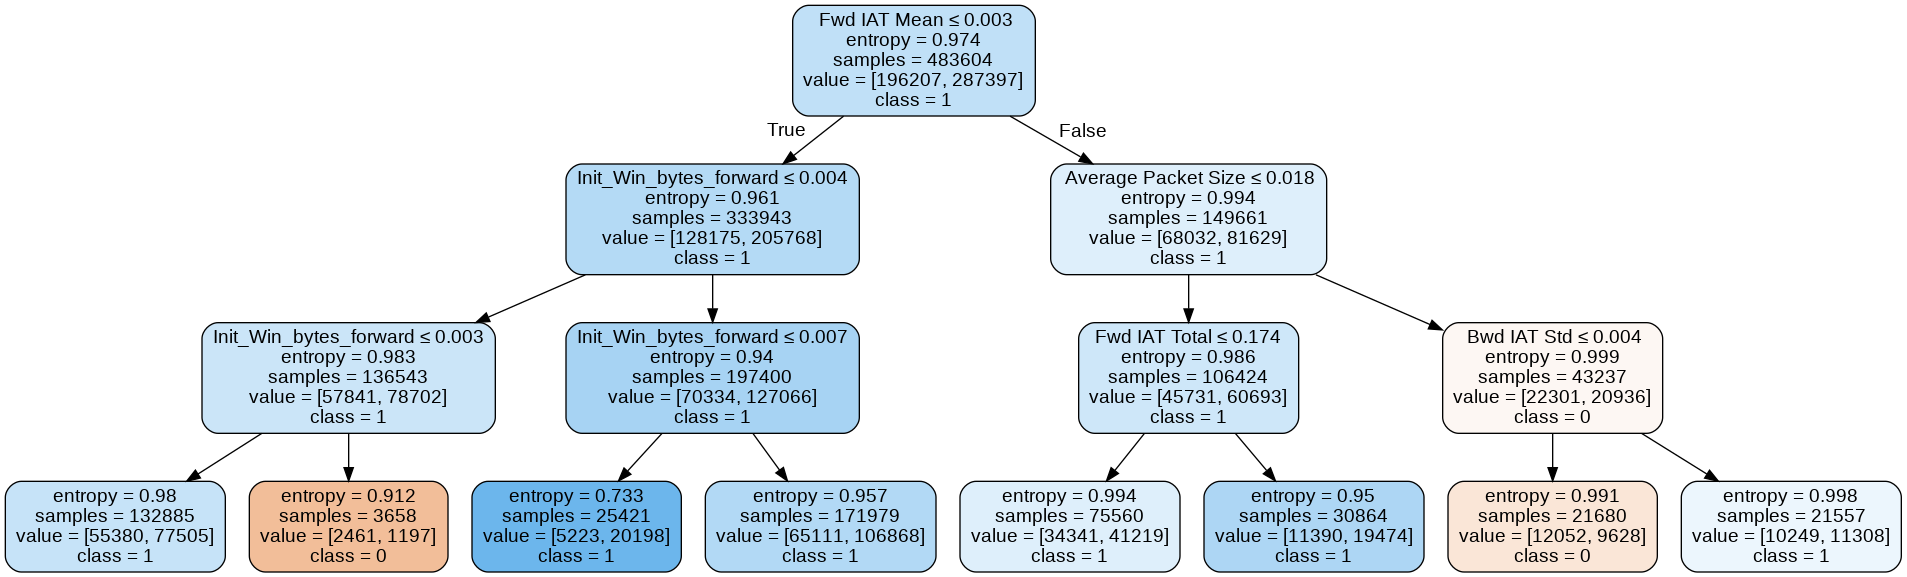

In [ ]:
# Decision tree algorithm with main dataset

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer """
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset """
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct? """
print("Accuracy for Decision tree algorithm with dataset ", len(new_column) , "features: ",metrics.accuracy_score(y_test, y_pred))

print("Visualizing the Decision tree with depth 3:")
# class_value : 0, 1 """
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = new_column, 
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('01.png')
Image(graph.create_png())

In [ ]:
y_train_pred_dt = clf.predict(X_train)
y_test_pred_dt = clf.predict(X_test)

print("Train Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_train_pred_dt,y_train)*100))
print("Test Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_test_pred_dt,y_test)*100))

print("Confusion Matrix for Decision tree algorithm: ")
confusion_matrix(y_test, y_test_pred_dt)

Train Set Accuracy for Decision tree algorithm: 60.19077592410319
Test Set Accuracy for Decision tree algorithm: 60.358969410402395
Confusion Matrix for Decision tree algorithm: 
Accuracy, Precions, Recall, F1 Score for Random Forest Algorithm:
Accuracy: 0.60359
Precions: 0.60546
Recall: 0.96196
F1: 0.74317


Accuracy for Decision tree algorithm with dataset  19 features:  0.6060358969410402
Visualizing the Decision tree with depth 4:


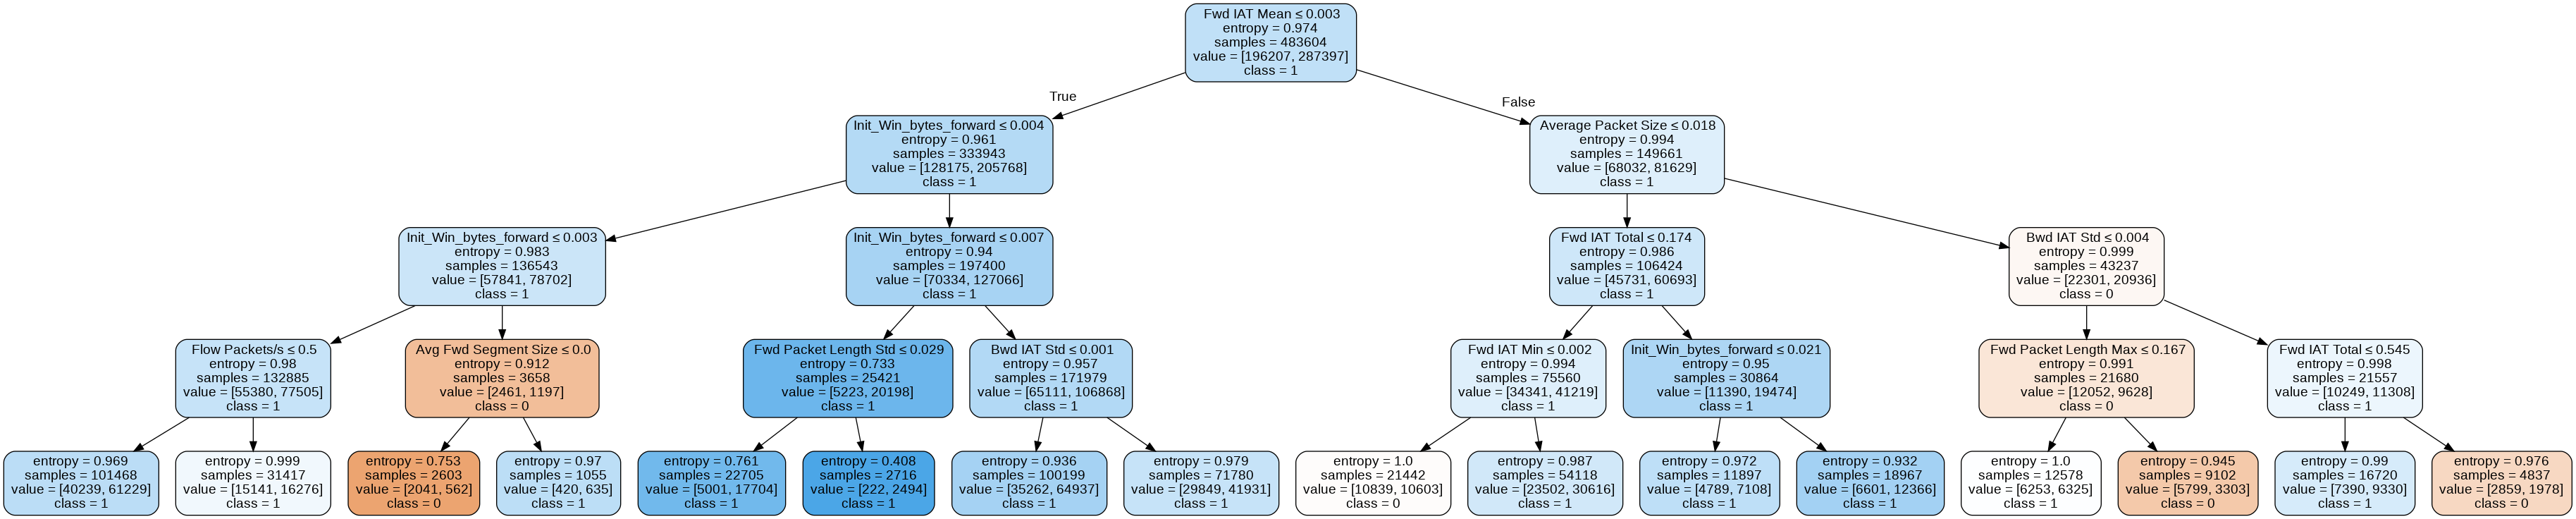

In [ ]:
# Decision tree algorithm with main dataset

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer """
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset """
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct? """
print("Accuracy for Decision tree algorithm with dataset ", len(new_column) , "features: ",metrics.accuracy_score(y_test, y_pred))

print("Visualizing the Decision tree with depth 4:")
# class_value : 0, 1 """
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = new_column, 
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('01.png')
Image(graph.create_png())

In [ ]:
y_train_pred_dt = clf.predict(X_train)
y_test_pred_dt = clf.predict(X_test)

print("Train Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_train_pred_dt,y_train)*100))
print("Test Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_test_pred_dt,y_test)*100))

print("Confusion Matrix for Decision tree algorithm: ")
confusion_matrix(y_test, y_test_pred_dt)

Train Set Accuracy for Decision tree algorithm: 60.48109610342346
Test Set Accuracy for Decision tree algorithm: 60.60358969410402
Confusion Matrix for Decision tree algorithm: 
Accuracy, Precions, Recall, F1 Score for Random Forest Algorithm:
Accuracy: 0.60604
Precions: 0.60969
Recall: 0.94271
F1: 0.74048


Accuracy for Decision tree algorithm with dataset  19 features:  0.6100791276657339
Visualizing the Decision tree with depth 5:


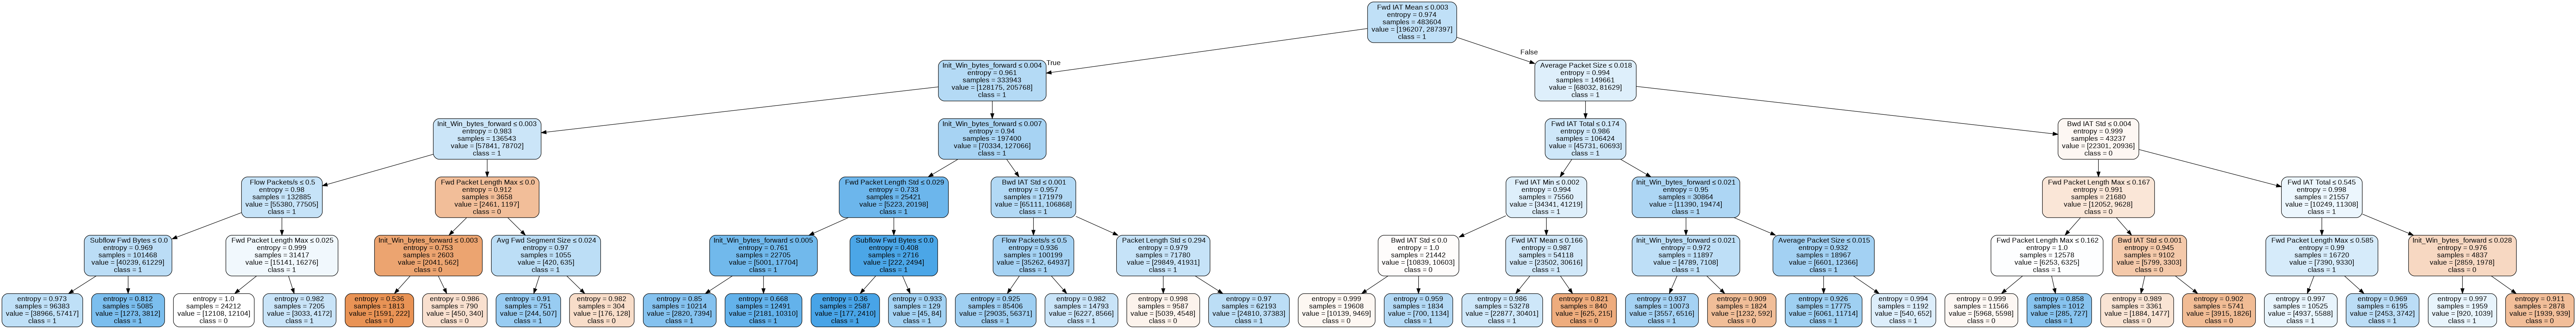

In [ ]:
# Decision tree algorithm with main dataset

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
# Train Decision Tree Classifer """
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset """
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct? """
print("Accuracy for Decision tree algorithm with dataset ", len(new_column) , "features: ",metrics.accuracy_score(y_test, y_pred))

print("Visualizing the Decision tree with depth 5:")
# class_value : 0, 1 """
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = new_column, 
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('01.png')
Image(graph.create_png())

In [ ]:
y_train_pred_dt = clf.predict(X_train)
y_test_pred_dt = clf.predict(X_test)

print("Train Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_train_pred_dt,y_train)*100))
print("Test Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_test_pred_dt,y_test)*100))

print("Confusion Matrix for Decision tree algorithm: ")
confusion_matrix(y_test, y_test_pred_dt)

Train Set Accuracy for Decision tree algorithm: 61.00135648174954
Test Set Accuracy for Decision tree algorithm: 61.00791276657339
Confusion Matrix for Decision tree algorithm: 
Accuracy, Precions, Recall, F1 Score for Random Forest Algorithm:
Accuracy: 0.61008
Precions: 0.62422
Recall: 0.86936
F1: 0.72667


Accuracy for Decision tree algorithm with dataset  19 features:  0.6137701437807584
Visualizing the Decision tree with depth 6:


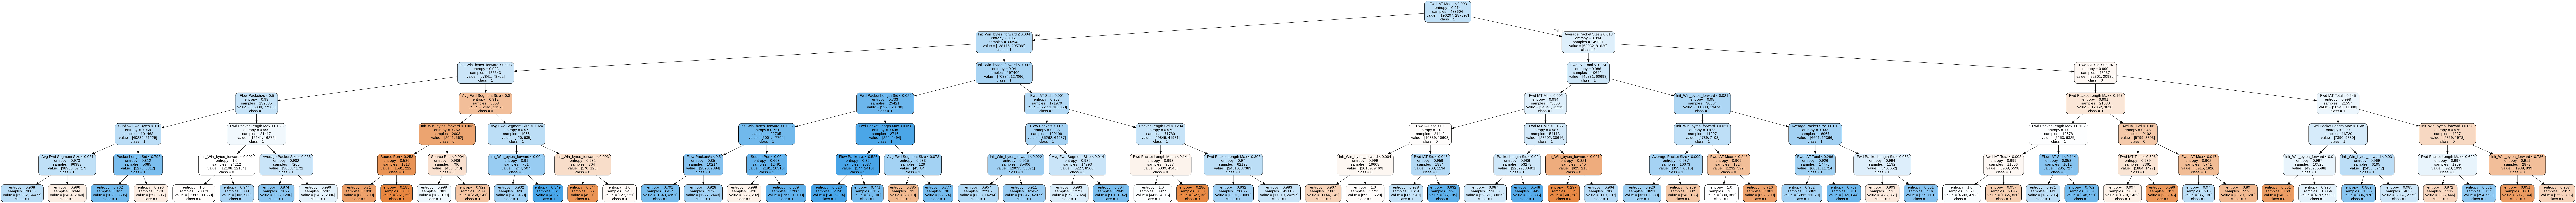

In [ ]:
# Decision tree algorithm with main dataset

clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)
# Train Decision Tree Classifer """
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset """
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct? """
print("Accuracy for Decision tree algorithm with dataset ", len(new_column) , "features: ",metrics.accuracy_score(y_test, y_pred))

print("Visualizing the Decision tree with depth 6:")
# class_value : 0, 1 """
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, 
                special_characters=True, feature_names = new_column, 
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('01.png')
Image(graph.create_png())

In [ ]:
y_train_pred_dt = clf.predict(X_train)
y_test_pred_dt = clf.predict(X_test)

print("Train Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_train_pred_dt,y_train)*100))
print("Test Set Accuracy for Decision tree algorithm: "+str(accuracy_score(y_test_pred_dt,y_test)*100))

print("Confusion Matrix for Decision tree algorithm: ")
confusion_matrix(y_test, y_test_pred_dt)

Train Set Accuracy for Decision tree algorithm: 61.34978205308476
Test Set Accuracy for Decision tree algorithm: 61.37701437807584
Confusion Matrix for Decision tree algorithm: 
Accuracy, Precions, Recall, F1 Score for Random Forest Algorithm:
Accuracy: 0.61377
Precions: 0.62295
Recall: 0.89222
F1: 0.73366


In [ ]:
def find_max_acc_decision_tree_algorithm():
  acc_dt = []
  for i in range (3,20):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy in decision tree with depth:", i ," is ",metrics.accuracy_score(y_test, y_pred))
    acc_dt.append(metrics.accuracy_score(y_test, y_pred))
  print("=========================================================")
  print("=========================================================")
  max=0.0
  id= 0
  for i in range(0,len(acc_dt)):
     if (max<acc_dt[i]):
        max = acc_dt[i]
        id = i

  print("maximum accuracy in Decision Tree: ", max)
  print("the best max_depth: ", i+3)

In [ ]:
find_max_acc_decision_tree_algorithm()

Accuracy in decision tree with depth: 3  is  0.603589694104024
Accuracy in decision tree with depth: 4  is  0.6060358969410402
Accuracy in decision tree with depth: 5  is  0.6100791276657339
Accuracy in decision tree with depth: 6  is  0.6137701437807584
Accuracy in decision tree with depth: 7  is  0.6204139727878027
Accuracy in decision tree with depth: 8  is  0.6286886036861913
Accuracy in decision tree with depth: 9  is  0.6348065232075654
Accuracy in decision tree with depth: 10  is  0.6428688603686191
Accuracy in decision tree with depth: 11  is  0.6448132780082988
Accuracy in decision tree with depth: 12  is  0.6494499662259964
Accuracy in decision tree with depth: 13  is  0.65350767152369
Accuracy in decision tree with depth: 14  is  0.6564701341310432
Accuracy in decision tree with depth: 15  is  0.6588729132490592
Accuracy in decision tree with depth: 16  is  0.6615121103927434
Accuracy in decision tree with depth: 17  is  0.6649956576281
Accuracy in decision tree with depth: 

5
Training the data ... 
6
Training the data ... 
7
Training the data ... 
8
Training the data ... 
9
Training the data ... 
10
Training the data ... 
------------------------------------
Apply for KNN Algorithm: 
------------------------------------
The range of neighbors: [15 ... 25]
The value for error rate when the K is changing :
[0.3549310045353662, 0.3735839042748239, 0.3557222811927048, 0.36920293351346134, 0.3566824278683779, 0.36668435781144454]
------------------------------------
The Best Value For K in KNN Algorithm : 5
The minimum value for error : 0.3549310045353662


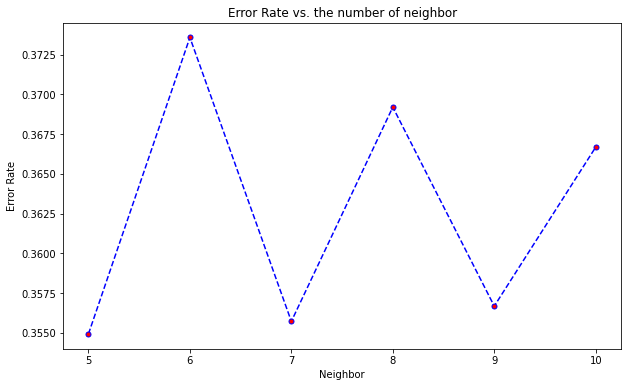

In [ ]:
error_rate = []
""" the number of neighbors are in range : [5 ... 10] """
minimum_error = 1
index = 0
for i in range(5, 11):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    print("Training the data ... ")
    knn = knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    mean_error_rate = np.mean(pred_i != y_test)
    """ finding the best value for k in knn algorithm """
    if mean_error_rate < minimum_error :
        minimum_error = mean_error_rate
        index = i
    error_rate.append(mean_error_rate)
print("------------------------------------")
print("Apply for KNN Algorithm: ")
print("------------------------------------")
print("The range of neighbors: [5 ... 10]")
print ("The value for error rate when the K is changing :")
print (error_rate)
print("------------------------------------")
plt.figure(figsize=(10,6))
plt.plot(range(5, 11),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. the number of neighbor')
plt.xlabel('Neighbor')
plt.ylabel('Error Rate')
print("The Best Value For K in KNN Algorithm :" , index)
print("The minimum value for error :" , minimum_error )

In [ ]:
print("The Best Value For K in KNN Algorithm :" , index)
print("The minimum value for error :" , minimum_error )
print("===================================================")
print("===================================================")

print("Apply for KNN algorithm with best K is equal to ", index)
knn = KNeighborsClassifier(n_neighbors=index)
print("Training the data ... ")
knn = knn.fit(X_train,y_train)
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

print("Train Set Accuracy in KNN algorithm with best K: "+str(accuracy_score(y_train_pred_knn,y_train)*100))
print("Test Set Accuracy in KNN algorithm with best K: "+str(accuracy_score(y_test_pred_knn,y_test)*100))

print("Confusion Matrix for random forest classifier: ")
confusion_matrix(y_test, y_test_pred_knn)

The Best Value For K in KNN Algorithm : 5
The minimum value for error : 0.3549310045353662
Apply for KNN algorithm with best K is equal to  5
Training the data ... 
Train Set Accuracy in KNN algorithm with best K: 76.39494296986791
Test Set Accuracy in KNN algorithm with best K: 64.50689954646339
Confusion Matrix for random forest classifier: 
Accuracy, Precions, Recall, F1 Score for Random Forest Algorithm:
Accuracy: 0.64507
Precions: 0.68382
Recall: 0.75272
F1: 0.71662


Training...

...ready!
Predicted     0.0  1.0
Actual                
0          279857   40
1          410847  120
Accuracy: 0.40526
Precions: 0.75000
Recall: 0.00029
F1: 0.00058


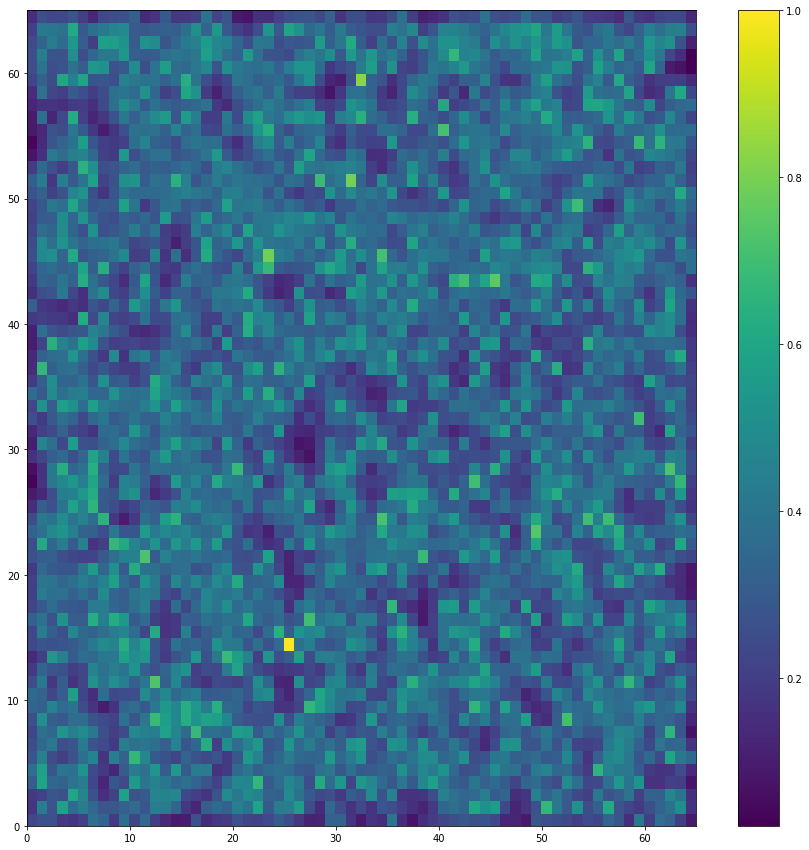

In [ ]:
som = MiniSom(x= 65, y = 65, input_len = len(new_column), sigma=0.1, learning_rate=0.3,random_seed=45)
random.seed(12)
som.random_weights_init(X_new_3.to_numpy())
print("Training...")
# Trains the SOM using all the vectors in data sequentially """ 
som.train_batch(data=X_new_3.to_numpy(),num_iteration=100) 
print("\n...ready!") 


# plotting the distance map """
dist_map = som.distance_map()
plt.figure(figsize=(15, 15))
plt.pcolor(dist_map.T) 
plt.colorbar()

X_new_3 = X_new_3.to_numpy()

# find the distances greater than 0.70 in the distance map """
distant_neurons_indexes = np.where(dist_map>0.70)


# compute the coordinates of the winner neuron for each sample of X """ 
map_neuron_indexes=np.zeros((len(X_new_3),2))
for j in range (len(X_new_3)):
    map_neuron_indexes[j]=(som.winner(X_new_3[j]))


total_fraud_neuron_customers={}
fraud_neuron_customers={}
# to find customer data indexes in distant neurons """
for k in range (len(distant_neurons_indexes[0])):
    fraud_neuron_customers[k] = np.where((map_neuron_indexes[:,0]==distant_neurons_indexes[0][k]) & (map_neuron_indexes[:,1]==distant_neurons_indexes[1][k]))

total_fraud_neuron_customers=np.concatenate((fraud_neuron_customers[0], fraud_neuron_customers[1]), axis=None)

# calculating the confusion matrix """
y_pred = np.zeros(len(y))
y_pred[total_fraud_neuron_customers] = 1

y_data = {'y_Actual':    y,
        'y_Predicted': y_pred }

df = pd.DataFrame(y_data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

confusion_matrix_arr=confusion_matrix.values

TP = confusion_matrix_arr[1,1] #true positive
FN = confusion_matrix_arr[1,0] #False negative
FP = confusion_matrix_arr[0,1] #False positive
TN = confusion_matrix_arr[0,0] #true negative

# Accuracy, Precions, Recall, F1 Score Calculation """
Acc = (TP+TN)/(TP+TN+FN+FP)
Prec = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*(Recall*Prec)/(Recall+Prec)

print("Accuracy:","%.5f" % Acc)
print ("Precions:","%.5f" %Prec )
print("Recall:","%.5f" % Recall)
print ("F1:","%.5f" %F1 )

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

from keras.utils import np_utils
y_train_after = np_utils.to_categorical(y_train)
y_test_after = np_utils.to_categorical(y_test)


mymodel = Sequential()
mymodel.add(Dense(19, activation = 'relu', input_shape=(len(new_column),)))
mymodel.add(Dense(14 , activation = 'relu'))

mymodel.add(Dense(9 , activation = 'relu'))
mymodel.add(Dense(5 , activation = 'relu'))

mymodel.add(Dense(2 , activation = 'softmax'))

mymodel.summary()
mymodel.compile(optimizer = SGD(lr=0.01), loss= categorical_crossentropy, metrics=['accuracy'])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                280       
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 135       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 12        
Total params: 857
Trainable params: 857
Non-trainable params: 0
_________________________________________________________________


Train on 386883 samples, validate on 96721 samples
Epoch 1/70
386883/386883 [==============================] - 10s 25us/step - loss: 0.6756 - accuracy: 0.5939 - val_loss: 0.6744 - val_accuracy: 0.5954
Epoch 2/70
386883/386883 [==============================] - 8s 21us/step - loss: 0.6748 - accuracy: 0.5940 - val_loss: 0.6741 - val_accuracy: 0.5954
Epoch 3/70
386883/386883 [==============================] - 8s 20us/step - loss: 0.6746 - accuracy: 0.5940 - val_loss: 0.6739 - val_accuracy: 0.5954
Epoch 4/70
386883/386883 [==============================] - 8s 22us/step - loss: 0.6742 - accuracy: 0.5940 - val_loss: 0.6736 - val_accuracy: 0.5954
Epoch 5/70
386883/386883 [==============================] - 8s 21us/step - loss: 0.6740 - accuracy: 0.5940 - val_loss: 0.6736 - val_accuracy: 0.5954
Epoch 6/70
386883/386883 [==============================] - 8s 21us/step - loss: 0.6738 - accuracy: 0.5940 - val_loss: 0.6733 - val_accuracy: 0.5954
Epoch 7/70
386883/386883 [============================

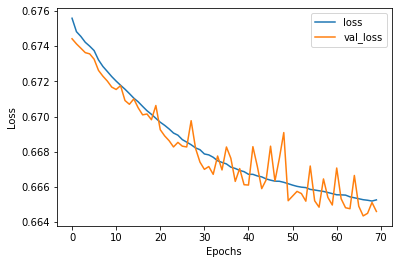

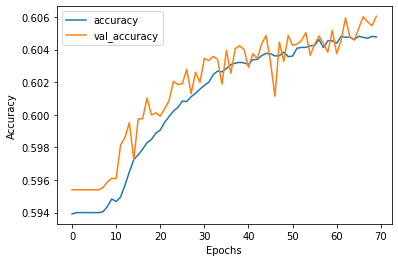

In [ ]:
import matplotlib.pyplot as plt

network_history = mymodel.fit(X_train, y_train_after, batch_size = 128, epochs=70, validation_split=0.2)
history = network_history.history

losses = history['loss']
val_losses = history['val_loss']
val_accuracies = history['val_accuracy']
accuracies = history['accuracy']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_losses)
plt.legend(['loss','val_loss'])
	
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)
plt.plot(val_accuracies)
plt.legend(['accuracy','val_accuracy'])

#evaluation
test_loss, test_acc = mymodel.evaluate(X_test, y_test_after)
test_labels_p = mymodel.predict(X_test)
import numpy as np
test_labels_p = np.argmax(test_labels_p, axis=1)

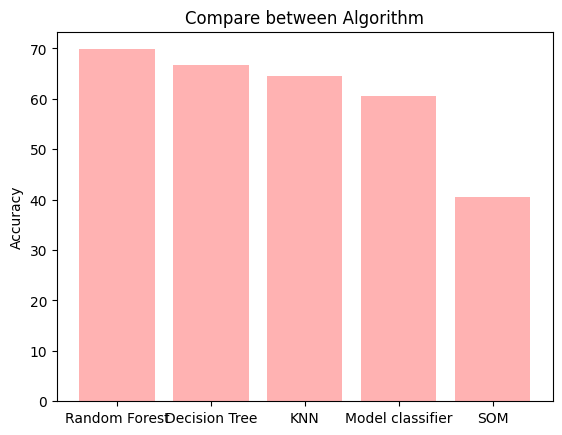

In [ ]:
# plotting the data between 5 different algorithms

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

Algorithm = ['Random Forest', 'Decision Tree', 'KNN', 'Model classifier', 'SOM']
y_pos = np.arange(len(Algorithm))

Accuracy = [69.81713789443211, 66.67374312457782, 64.50689954646339, 60.48, 40.526]

plt.bar(y_pos, Accuracy, align='center', alpha=0.3, color='r')
plt.xticks(y_pos, Algorithm)
plt.ylabel('Accuracy')
plt.title('Compare between Algorithm')

plt.show()

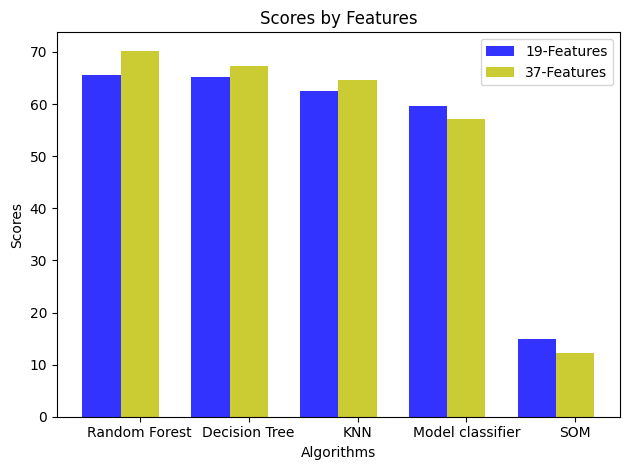

In [ ]:
# plotting the F1-Score for two dataset in Different algorithms

import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
F1_score_23_Features = (65.5765704911705, 65.23111068223487, 62.53498021808357, 59.5903, 14.90 )
F1_score_36_Features = (70.25597220881984, 67.39119945961594, 64.64489047573096, 57.20, 12.229)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, F1_score_23_Features, bar_width,
alpha=opacity,
color='b',
label='19-Features')

rects2 = plt.bar(index + bar_width, F1_score_36_Features, bar_width,
alpha=opacity,
color='y',
label='37-Features')

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Scores by Features')
plt.xticks(index + bar_width, ('Random Forest', 'Decision Tree', 'KNN', 'Model classifier', 'SOM'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

finaldata['label'].value_counts()

BENIGN                       410967
SCAREWARE_ANDROIDDEFENDER     56440
ADWARE_EWIND                  43374
ADWARE_DOWGIN                 39682
RANSOMWARE_CHARGER            39551
SMSMALWARE_BIIGE              33675
RANSOMWARE_JISUT              25672
SCAREWARE_ANDROIDSPY          25414
SMSMALWARE_BEANBOT            12371
SCAREWARE                      3715
Name: label, dtype: int64

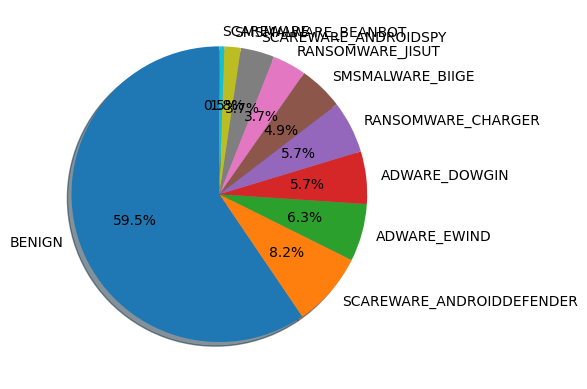

In [ ]:
labels = ['BENIGN', 'SCAREWARE_ANDROIDDEFENDER', 'ADWARE_EWIND', 'ADWARE_DOWGIN', 'RANSOMWARE_CHARGER', 
          'SMSMALWARE_BIIGE', 'RANSOMWARE_JISUT', 'SCAREWARE_ANDROIDSPY', 'SMSMALWARE_BEANBOT', 'SCAREWARE']
values = finaldata['label'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct ='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [ ]:
port_benign = []
port_adware = []

for i in range (len(finaldata)):
    if ((finaldata.iloc[i,71] == 1)): 
        port_benign.append(finaldata.iloc[i,0])
    elif ((finaldata.iloc[i,71] == 0)):
        port_adware.append(finaldata.iloc[i,0])

In [ ]:
a = np.array(port_benign)
np.unique(a)
print(len(np.unique(a)))

52934


In [ ]:
b = np.array(port_adware)
np.unique(b)
print(len(np.unique(b)))

47617


In [ ]:
new_list = []
for x in b: 
  if x not in a: 
    new_list.append(x) 

In [ ]:
print(new_list)
print(len(new_list))

[47056, 46073, 51584, 51584, 54426, 46073, 46073, 29486, 16990, 26415, 63365, 3411, 20623, 17874, 2579, 18361, 14877, 1516, 16358, 23634, 8669, 63518, 16546, 28428, 31036, 12000, 16417, 20714, 31253, 13841, 3376, 19075, 5889, 62889, 14029, 8237, 24014, 1332, 29276, 15644, 31280, 7610, 9290, 61263, 24324, 63465, 17967, 2516, 8514, 32082, 63612, 36478, 12012, 2173, 16257, 20990, 5560, 21749, 8103, 21181, 5244, 16994, 22873, 62492, 45380, 12810, 25354, 16150, 3597, 12946, 8850, 29633, 17561, 26856, 27861, 8053, 7568, 13651, 28885, 10375, 6373, 22051, 4548, 61112, 9822, 9307, 16114, 15871, 26281, 9988, 6450, 25866, 64906, 31445, 64960, 22364, 29316, 31728, 3929, 24680, 15288, 62367, 12061, 22178, 6110, 25671, 54235, 41408, 41408, 10772, 22308, 62168, 6960, 27739, 12888, 6555, 25899, 7799, 23188, 11614, 16674, 61287, 32476, 6019, 12482, 28856, 32652, 30580, 19891, 31881, 62545, 21770, 23795, 16932, 18279, 25660, 6170, 23966, 28446, 29041, 64975, 24641, 21864, 15554, 16431, 11019, 16130, 196